In [1]:
import numpy as np
from training_data import *
from test_data import *
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

p = 100
Ntrain = 100
Ntest = 100
params = 4

def sample_Z(Ntrain, params):
    return np.random.uniform(-1., 1., size=[Ntrain*2, params])

def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,params)

    return out

def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,params)
        out = tf.layers.dense(h3,1)

    return out, h3


X = tf.placeholder(tf.float32,[Ntrain*2,params])
Z = tf.placeholder(tf.float32,[Ntrain*2,params])

G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step



# sess = tf.Session(config=config)
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 256
nd_steps = 10
ng_steps = 10

x_plot = train_data(p,Ntrain)

n = 10001
dloss = np.zeros(n)
gloss = np.zeros(n)

dX = np.zeros((n,nd_steps))
gX = np.zeros((n,ng_steps))
for i in range(n):
    X_batch = train_data(p,Ntrain)
    Z_batch = sample_Z(Ntrain, params)

    for _ in range(nd_steps):
        dX[i,_], dloss[i] = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        gX[i,_], gloss[i] = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    print ("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss[i],gloss[i]))
    



Instructions for updating:
non-resource variables are not supported in the long term


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Iterations: 0	 Discriminator loss: 40.9430	 Generator loss: 0.7307
Iterations: 1	 Discriminator loss: 24.2444	 Generator loss: 0.7074
Iterations: 2	 Discriminator loss: 11.7098	 Generator loss: 0.6937
Iterations: 3	 Discriminator loss: 6.4338	 Generator loss: 0.6721
Iterations: 4	 Discriminator loss: 3.3601	 Generator loss: 0.6988
Iterations: 5	 Discriminator loss: 2.3847	 Generator loss: 0.7128
Iterations: 6	 Discriminator loss: 1.2789	 Generator loss: 0.7314
Iterations: 7	 Discriminator loss: 0.9794	 Generator loss: 0.7662
Iterations: 8	 Discriminator loss: 0.6355	 Generator loss: 0.7903
Iterations: 9	 Discriminator loss: 0.5897	 Generator loss: 0.8222
Iterations: 10	 Discriminator loss: 0.5976	 Generator loss: 0.8396
Iterations: 11	 Discriminator loss: 0.5431	 Generator loss: 0.8590
Iterations: 12	 Discriminator loss: 0.5166	 Generator loss: 0.8989
Iterations: 13	 Di

Iterations: 120	 Discriminator loss: 0.1168	 Generator loss: 5.7480
Iterations: 121	 Discriminator loss: 0.0028	 Generator loss: 6.6749
Iterations: 122	 Discriminator loss: 0.0449	 Generator loss: 4.9478
Iterations: 123	 Discriminator loss: 0.0968	 Generator loss: 3.8082
Iterations: 124	 Discriminator loss: 0.0595	 Generator loss: 4.4006
Iterations: 125	 Discriminator loss: 0.1999	 Generator loss: 10.4918
Iterations: 126	 Discriminator loss: 0.0043	 Generator loss: 6.4118
Iterations: 127	 Discriminator loss: 0.0350	 Generator loss: 5.6216
Iterations: 128	 Discriminator loss: 0.1815	 Generator loss: 9.1762
Iterations: 129	 Discriminator loss: 0.0015	 Generator loss: 7.5301
Iterations: 130	 Discriminator loss: 0.2198	 Generator loss: 9.1138
Iterations: 131	 Discriminator loss: 0.0546	 Generator loss: 8.4677
Iterations: 132	 Discriminator loss: 0.0102	 Generator loss: 8.5487
Iterations: 133	 Discriminator loss: 0.0805	 Generator loss: 10.1242
Iterations: 134	 Discriminator loss: 0.0969	 G

Iterations: 245	 Discriminator loss: 0.3655	 Generator loss: 4.7060
Iterations: 246	 Discriminator loss: 0.5289	 Generator loss: 4.3336
Iterations: 247	 Discriminator loss: 0.3059	 Generator loss: 2.4218
Iterations: 248	 Discriminator loss: 0.3272	 Generator loss: 2.0544
Iterations: 249	 Discriminator loss: 0.5331	 Generator loss: 2.2356
Iterations: 250	 Discriminator loss: 0.3819	 Generator loss: 5.1188
Iterations: 251	 Discriminator loss: 0.5699	 Generator loss: 7.7852
Iterations: 252	 Discriminator loss: 0.5299	 Generator loss: 6.3895
Iterations: 253	 Discriminator loss: 0.8584	 Generator loss: 2.6880
Iterations: 254	 Discriminator loss: 0.4339	 Generator loss: 2.2006
Iterations: 255	 Discriminator loss: 0.4464	 Generator loss: 3.8651
Iterations: 256	 Discriminator loss: 0.4022	 Generator loss: 4.1471
Iterations: 257	 Discriminator loss: 0.4849	 Generator loss: 2.0681
Iterations: 258	 Discriminator loss: 0.2659	 Generator loss: 4.1027
Iterations: 259	 Discriminator loss: 0.7323	 Gen

Iterations: 372	 Discriminator loss: 0.4754	 Generator loss: 3.4653
Iterations: 373	 Discriminator loss: 0.4494	 Generator loss: 3.3086
Iterations: 374	 Discriminator loss: 0.5574	 Generator loss: 2.9916
Iterations: 375	 Discriminator loss: 0.6363	 Generator loss: 3.4364
Iterations: 376	 Discriminator loss: 0.4109	 Generator loss: 3.3080
Iterations: 377	 Discriminator loss: 0.4980	 Generator loss: 3.2518
Iterations: 378	 Discriminator loss: 0.5721	 Generator loss: 2.9049
Iterations: 379	 Discriminator loss: 0.5184	 Generator loss: 2.8286
Iterations: 380	 Discriminator loss: 0.3491	 Generator loss: 3.4780
Iterations: 381	 Discriminator loss: 0.4763	 Generator loss: 3.0994
Iterations: 382	 Discriminator loss: 0.5088	 Generator loss: 3.0097
Iterations: 383	 Discriminator loss: 0.3113	 Generator loss: 3.0945
Iterations: 384	 Discriminator loss: 0.3264	 Generator loss: 3.4874
Iterations: 385	 Discriminator loss: 0.3669	 Generator loss: 3.3830
Iterations: 386	 Discriminator loss: 0.4295	 Gen

Iterations: 496	 Discriminator loss: 1.2710	 Generator loss: 1.0236
Iterations: 497	 Discriminator loss: 1.2198	 Generator loss: 1.0911
Iterations: 498	 Discriminator loss: 1.2519	 Generator loss: 1.0187
Iterations: 499	 Discriminator loss: 1.2977	 Generator loss: 1.0351
Iterations: 500	 Discriminator loss: 1.2434	 Generator loss: 1.0872
Iterations: 501	 Discriminator loss: 1.2578	 Generator loss: 1.0568
Iterations: 502	 Discriminator loss: 1.2854	 Generator loss: 0.9725
Iterations: 503	 Discriminator loss: 1.2683	 Generator loss: 1.0916
Iterations: 504	 Discriminator loss: 1.2534	 Generator loss: 1.0544
Iterations: 505	 Discriminator loss: 1.2442	 Generator loss: 1.1021
Iterations: 506	 Discriminator loss: 1.1675	 Generator loss: 1.0667
Iterations: 507	 Discriminator loss: 1.2403	 Generator loss: 1.1018
Iterations: 508	 Discriminator loss: 1.1373	 Generator loss: 1.1342
Iterations: 509	 Discriminator loss: 1.2735	 Generator loss: 1.0552
Iterations: 510	 Discriminator loss: 1.2006	 Gen

Iterations: 617	 Discriminator loss: 1.2908	 Generator loss: 0.9680
Iterations: 618	 Discriminator loss: 1.3075	 Generator loss: 0.8926
Iterations: 619	 Discriminator loss: 1.2998	 Generator loss: 0.8655
Iterations: 620	 Discriminator loss: 1.3117	 Generator loss: 0.9339
Iterations: 621	 Discriminator loss: 1.3341	 Generator loss: 0.8364
Iterations: 622	 Discriminator loss: 1.3154	 Generator loss: 0.6524
Iterations: 623	 Discriminator loss: 1.3088	 Generator loss: 0.7151
Iterations: 624	 Discriminator loss: 1.3253	 Generator loss: 0.7170
Iterations: 625	 Discriminator loss: 1.3041	 Generator loss: 0.6953
Iterations: 626	 Discriminator loss: 1.2748	 Generator loss: 0.7446
Iterations: 627	 Discriminator loss: 1.3024	 Generator loss: 0.7091
Iterations: 628	 Discriminator loss: 1.2823	 Generator loss: 0.6835
Iterations: 629	 Discriminator loss: 1.2941	 Generator loss: 0.6692
Iterations: 630	 Discriminator loss: 1.2911	 Generator loss: 0.7237
Iterations: 631	 Discriminator loss: 1.2847	 Gen

Iterations: 745	 Discriminator loss: 1.2890	 Generator loss: 0.8210
Iterations: 746	 Discriminator loss: 1.2590	 Generator loss: 0.8485
Iterations: 747	 Discriminator loss: 1.2775	 Generator loss: 0.8363
Iterations: 748	 Discriminator loss: 1.3036	 Generator loss: 0.6416
Iterations: 749	 Discriminator loss: 1.3078	 Generator loss: 0.7158
Iterations: 750	 Discriminator loss: 1.3243	 Generator loss: 0.7017
Iterations: 751	 Discriminator loss: 1.3075	 Generator loss: 0.6699
Iterations: 752	 Discriminator loss: 1.3119	 Generator loss: 0.6995
Iterations: 753	 Discriminator loss: 1.3331	 Generator loss: 0.6095
Iterations: 754	 Discriminator loss: 1.3306	 Generator loss: 0.7017
Iterations: 755	 Discriminator loss: 1.2718	 Generator loss: 0.7183
Iterations: 756	 Discriminator loss: 1.3107	 Generator loss: 0.9076
Iterations: 757	 Discriminator loss: 1.3329	 Generator loss: 0.8699
Iterations: 758	 Discriminator loss: 1.2551	 Generator loss: 0.8449
Iterations: 759	 Discriminator loss: 1.3157	 Gen

Iterations: 868	 Discriminator loss: 1.2904	 Generator loss: 0.6910
Iterations: 869	 Discriminator loss: 1.3044	 Generator loss: 0.7106
Iterations: 870	 Discriminator loss: 1.3285	 Generator loss: 0.8704
Iterations: 871	 Discriminator loss: 1.2721	 Generator loss: 0.8997
Iterations: 872	 Discriminator loss: 1.2916	 Generator loss: 0.8406
Iterations: 873	 Discriminator loss: 1.2875	 Generator loss: 0.8823
Iterations: 874	 Discriminator loss: 1.3163	 Generator loss: 0.8884
Iterations: 875	 Discriminator loss: 1.2771	 Generator loss: 0.8955
Iterations: 876	 Discriminator loss: 1.2998	 Generator loss: 0.9113
Iterations: 877	 Discriminator loss: 1.3154	 Generator loss: 0.8764
Iterations: 878	 Discriminator loss: 1.2987	 Generator loss: 0.9149
Iterations: 879	 Discriminator loss: 1.3075	 Generator loss: 0.8002
Iterations: 880	 Discriminator loss: 1.2865	 Generator loss: 0.8132
Iterations: 881	 Discriminator loss: 1.2947	 Generator loss: 0.9198
Iterations: 882	 Discriminator loss: 1.2659	 Gen

Iterations: 995	 Discriminator loss: 1.2966	 Generator loss: 0.8786
Iterations: 996	 Discriminator loss: 1.2855	 Generator loss: 0.8421
Iterations: 997	 Discriminator loss: 1.3117	 Generator loss: 0.8624
Iterations: 998	 Discriminator loss: 1.2859	 Generator loss: 0.9160
Iterations: 999	 Discriminator loss: 1.2683	 Generator loss: 0.8731
Iterations: 1000	 Discriminator loss: 1.2873	 Generator loss: 0.9070
Iterations: 1001	 Discriminator loss: 1.2963	 Generator loss: 0.8353
Iterations: 1002	 Discriminator loss: 1.2559	 Generator loss: 0.8964
Iterations: 1003	 Discriminator loss: 1.3102	 Generator loss: 0.8319
Iterations: 1004	 Discriminator loss: 1.2785	 Generator loss: 0.8748
Iterations: 1005	 Discriminator loss: 1.3042	 Generator loss: 0.9100
Iterations: 1006	 Discriminator loss: 1.2757	 Generator loss: 0.9441
Iterations: 1007	 Discriminator loss: 1.2919	 Generator loss: 0.8246
Iterations: 1008	 Discriminator loss: 1.3226	 Generator loss: 0.7671
Iterations: 1009	 Discriminator loss: 1

Iterations: 1119	 Discriminator loss: 1.3232	 Generator loss: 0.6602
Iterations: 1120	 Discriminator loss: 1.2978	 Generator loss: 0.6531
Iterations: 1121	 Discriminator loss: 1.3104	 Generator loss: 0.6832
Iterations: 1122	 Discriminator loss: 1.2781	 Generator loss: 0.7066
Iterations: 1123	 Discriminator loss: 1.3053	 Generator loss: 0.8285
Iterations: 1124	 Discriminator loss: 1.3156	 Generator loss: 0.9529
Iterations: 1125	 Discriminator loss: 1.3003	 Generator loss: 0.8523
Iterations: 1126	 Discriminator loss: 1.2682	 Generator loss: 0.8458
Iterations: 1127	 Discriminator loss: 1.3434	 Generator loss: 0.7093
Iterations: 1128	 Discriminator loss: 1.2851	 Generator loss: 0.7342
Iterations: 1129	 Discriminator loss: 1.2594	 Generator loss: 0.7581
Iterations: 1130	 Discriminator loss: 1.3103	 Generator loss: 0.6662
Iterations: 1131	 Discriminator loss: 1.2677	 Generator loss: 0.6754
Iterations: 1132	 Discriminator loss: 1.2871	 Generator loss: 0.6831
Iterations: 1133	 Discriminator lo

Iterations: 1243	 Discriminator loss: 1.2840	 Generator loss: 0.7110
Iterations: 1244	 Discriminator loss: 1.2546	 Generator loss: 0.7578
Iterations: 1245	 Discriminator loss: 1.2781	 Generator loss: 0.6922
Iterations: 1246	 Discriminator loss: 1.2591	 Generator loss: 0.7198
Iterations: 1247	 Discriminator loss: 1.2789	 Generator loss: 0.6854
Iterations: 1248	 Discriminator loss: 1.2532	 Generator loss: 0.7562
Iterations: 1249	 Discriminator loss: 1.2915	 Generator loss: 0.7214
Iterations: 1250	 Discriminator loss: 1.2828	 Generator loss: 0.6871
Iterations: 1251	 Discriminator loss: 1.3067	 Generator loss: 0.7113
Iterations: 1252	 Discriminator loss: 1.3086	 Generator loss: 0.6695
Iterations: 1253	 Discriminator loss: 1.3088	 Generator loss: 0.7268
Iterations: 1254	 Discriminator loss: 1.2534	 Generator loss: 0.7294
Iterations: 1255	 Discriminator loss: 1.2937	 Generator loss: 0.7075
Iterations: 1256	 Discriminator loss: 1.2832	 Generator loss: 0.6790
Iterations: 1257	 Discriminator lo

Iterations: 1366	 Discriminator loss: 1.2534	 Generator loss: 0.7463
Iterations: 1367	 Discriminator loss: 1.2627	 Generator loss: 0.7689
Iterations: 1368	 Discriminator loss: 1.2596	 Generator loss: 0.8573
Iterations: 1369	 Discriminator loss: 1.2454	 Generator loss: 0.9058
Iterations: 1370	 Discriminator loss: 1.2869	 Generator loss: 0.9461
Iterations: 1371	 Discriminator loss: 1.2699	 Generator loss: 0.8910
Iterations: 1372	 Discriminator loss: 1.3203	 Generator loss: 0.9133
Iterations: 1373	 Discriminator loss: 1.3085	 Generator loss: 0.9304
Iterations: 1374	 Discriminator loss: 1.2799	 Generator loss: 0.8400
Iterations: 1375	 Discriminator loss: 1.2779	 Generator loss: 0.8618
Iterations: 1376	 Discriminator loss: 1.3373	 Generator loss: 0.9470
Iterations: 1377	 Discriminator loss: 1.2475	 Generator loss: 0.8871
Iterations: 1378	 Discriminator loss: 1.2564	 Generator loss: 0.8966
Iterations: 1379	 Discriminator loss: 1.2951	 Generator loss: 0.9081
Iterations: 1380	 Discriminator lo

Iterations: 1485	 Discriminator loss: 1.3441	 Generator loss: 0.9424
Iterations: 1486	 Discriminator loss: 1.2565	 Generator loss: 0.8625
Iterations: 1487	 Discriminator loss: 1.2657	 Generator loss: 0.8505
Iterations: 1488	 Discriminator loss: 1.2632	 Generator loss: 0.8859
Iterations: 1489	 Discriminator loss: 1.2562	 Generator loss: 0.8022
Iterations: 1490	 Discriminator loss: 1.2580	 Generator loss: 0.7379
Iterations: 1491	 Discriminator loss: 1.2829	 Generator loss: 0.6367
Iterations: 1492	 Discriminator loss: 1.2885	 Generator loss: 0.6681
Iterations: 1493	 Discriminator loss: 1.2322	 Generator loss: 0.7062
Iterations: 1494	 Discriminator loss: 1.2709	 Generator loss: 0.6838
Iterations: 1495	 Discriminator loss: 1.2217	 Generator loss: 0.7280
Iterations: 1496	 Discriminator loss: 1.3037	 Generator loss: 0.6766
Iterations: 1497	 Discriminator loss: 1.2697	 Generator loss: 0.6781
Iterations: 1498	 Discriminator loss: 1.2575	 Generator loss: 0.6793
Iterations: 1499	 Discriminator lo

Iterations: 1610	 Discriminator loss: 1.1956	 Generator loss: 0.7319
Iterations: 1611	 Discriminator loss: 1.2342	 Generator loss: 0.7006
Iterations: 1612	 Discriminator loss: 1.2410	 Generator loss: 0.7226
Iterations: 1613	 Discriminator loss: 1.2689	 Generator loss: 0.7308
Iterations: 1614	 Discriminator loss: 1.2579	 Generator loss: 0.7119
Iterations: 1615	 Discriminator loss: 1.2377	 Generator loss: 0.6879
Iterations: 1616	 Discriminator loss: 1.2675	 Generator loss: 0.7125
Iterations: 1617	 Discriminator loss: 1.2956	 Generator loss: 0.6890
Iterations: 1618	 Discriminator loss: 1.2564	 Generator loss: 0.6869
Iterations: 1619	 Discriminator loss: 1.2595	 Generator loss: 0.7412
Iterations: 1620	 Discriminator loss: 1.2355	 Generator loss: 0.7066
Iterations: 1621	 Discriminator loss: 1.2437	 Generator loss: 0.6958
Iterations: 1622	 Discriminator loss: 1.2605	 Generator loss: 0.6692
Iterations: 1623	 Discriminator loss: 1.1919	 Generator loss: 0.7334
Iterations: 1624	 Discriminator lo

Iterations: 1731	 Discriminator loss: 1.2375	 Generator loss: 1.0254
Iterations: 1732	 Discriminator loss: 1.2572	 Generator loss: 0.9164
Iterations: 1733	 Discriminator loss: 1.2806	 Generator loss: 0.9848
Iterations: 1734	 Discriminator loss: 1.2165	 Generator loss: 1.0025
Iterations: 1735	 Discriminator loss: 1.2423	 Generator loss: 0.9614
Iterations: 1736	 Discriminator loss: 1.2344	 Generator loss: 0.9294
Iterations: 1737	 Discriminator loss: 1.2470	 Generator loss: 0.9955
Iterations: 1738	 Discriminator loss: 1.2130	 Generator loss: 0.9771
Iterations: 1739	 Discriminator loss: 1.2727	 Generator loss: 0.9197
Iterations: 1740	 Discriminator loss: 1.2097	 Generator loss: 0.9766
Iterations: 1741	 Discriminator loss: 1.2544	 Generator loss: 0.9459
Iterations: 1742	 Discriminator loss: 1.2437	 Generator loss: 1.0197
Iterations: 1743	 Discriminator loss: 1.2464	 Generator loss: 0.9595
Iterations: 1744	 Discriminator loss: 1.2245	 Generator loss: 1.2563
Iterations: 1745	 Discriminator lo

Iterations: 1854	 Discriminator loss: 1.2453	 Generator loss: 0.9919
Iterations: 1855	 Discriminator loss: 1.1594	 Generator loss: 1.0426
Iterations: 1856	 Discriminator loss: 1.1881	 Generator loss: 0.9948
Iterations: 1857	 Discriminator loss: 1.1892	 Generator loss: 1.0354
Iterations: 1858	 Discriminator loss: 1.1785	 Generator loss: 1.0615
Iterations: 1859	 Discriminator loss: 1.2253	 Generator loss: 0.9480
Iterations: 1860	 Discriminator loss: 1.2704	 Generator loss: 1.1129
Iterations: 1861	 Discriminator loss: 1.2285	 Generator loss: 0.9520
Iterations: 1862	 Discriminator loss: 1.1752	 Generator loss: 1.0054
Iterations: 1863	 Discriminator loss: 1.1798	 Generator loss: 0.9457
Iterations: 1864	 Discriminator loss: 1.2030	 Generator loss: 1.0228
Iterations: 1865	 Discriminator loss: 1.2138	 Generator loss: 0.9434
Iterations: 1866	 Discriminator loss: 1.2195	 Generator loss: 0.9563
Iterations: 1867	 Discriminator loss: 1.2105	 Generator loss: 1.0011
Iterations: 1868	 Discriminator lo

Iterations: 1973	 Discriminator loss: 1.2211	 Generator loss: 1.0159
Iterations: 1974	 Discriminator loss: 1.2145	 Generator loss: 0.9700
Iterations: 1975	 Discriminator loss: 1.1562	 Generator loss: 1.0790
Iterations: 1976	 Discriminator loss: 1.2393	 Generator loss: 1.1023
Iterations: 1977	 Discriminator loss: 1.1905	 Generator loss: 1.0141
Iterations: 1978	 Discriminator loss: 1.2190	 Generator loss: 1.0673
Iterations: 1979	 Discriminator loss: 1.2353	 Generator loss: 0.9618
Iterations: 1980	 Discriminator loss: 1.1932	 Generator loss: 1.0787
Iterations: 1981	 Discriminator loss: 1.1683	 Generator loss: 1.0817
Iterations: 1982	 Discriminator loss: 1.2276	 Generator loss: 0.9957
Iterations: 1983	 Discriminator loss: 1.1929	 Generator loss: 1.1287
Iterations: 1984	 Discriminator loss: 1.2731	 Generator loss: 1.0212
Iterations: 1985	 Discriminator loss: 1.2884	 Generator loss: 0.9663
Iterations: 1986	 Discriminator loss: 1.2231	 Generator loss: 1.0713
Iterations: 1987	 Discriminator lo

Iterations: 2099	 Discriminator loss: 1.1863	 Generator loss: 0.7410
Iterations: 2100	 Discriminator loss: 1.2146	 Generator loss: 0.7329
Iterations: 2101	 Discriminator loss: 1.1696	 Generator loss: 0.7831
Iterations: 2102	 Discriminator loss: 1.1880	 Generator loss: 0.7225
Iterations: 2103	 Discriminator loss: 1.1861	 Generator loss: 0.7936
Iterations: 2104	 Discriminator loss: 1.1892	 Generator loss: 0.7815
Iterations: 2105	 Discriminator loss: 1.1936	 Generator loss: 0.7633
Iterations: 2106	 Discriminator loss: 1.1940	 Generator loss: 0.7590
Iterations: 2107	 Discriminator loss: 1.2430	 Generator loss: 0.7254
Iterations: 2108	 Discriminator loss: 1.1315	 Generator loss: 0.8369
Iterations: 2109	 Discriminator loss: 1.2106	 Generator loss: 0.8013
Iterations: 2110	 Discriminator loss: 1.2042	 Generator loss: 0.7232
Iterations: 2111	 Discriminator loss: 1.1453	 Generator loss: 0.7468
Iterations: 2112	 Discriminator loss: 1.2241	 Generator loss: 0.6665
Iterations: 2113	 Discriminator lo

Iterations: 2224	 Discriminator loss: 1.2110	 Generator loss: 1.0477
Iterations: 2225	 Discriminator loss: 1.1820	 Generator loss: 1.0195
Iterations: 2226	 Discriminator loss: 1.2057	 Generator loss: 1.0369
Iterations: 2227	 Discriminator loss: 1.1463	 Generator loss: 1.2173
Iterations: 2228	 Discriminator loss: 1.1996	 Generator loss: 1.0715
Iterations: 2229	 Discriminator loss: 1.1703	 Generator loss: 1.0869
Iterations: 2230	 Discriminator loss: 1.1813	 Generator loss: 1.0353
Iterations: 2231	 Discriminator loss: 1.2275	 Generator loss: 1.0988
Iterations: 2232	 Discriminator loss: 1.2020	 Generator loss: 1.0505
Iterations: 2233	 Discriminator loss: 1.2621	 Generator loss: 1.0664
Iterations: 2234	 Discriminator loss: 1.1400	 Generator loss: 1.2283
Iterations: 2235	 Discriminator loss: 1.1376	 Generator loss: 1.0906
Iterations: 2236	 Discriminator loss: 1.1761	 Generator loss: 1.1516
Iterations: 2237	 Discriminator loss: 1.1941	 Generator loss: 1.0274
Iterations: 2238	 Discriminator lo

Iterations: 2349	 Discriminator loss: 1.2228	 Generator loss: 1.0806
Iterations: 2350	 Discriminator loss: 1.1404	 Generator loss: 1.1134
Iterations: 2351	 Discriminator loss: 1.1637	 Generator loss: 1.0594
Iterations: 2352	 Discriminator loss: 1.1951	 Generator loss: 1.0340
Iterations: 2353	 Discriminator loss: 1.1988	 Generator loss: 1.1671
Iterations: 2354	 Discriminator loss: 1.1755	 Generator loss: 1.1293
Iterations: 2355	 Discriminator loss: 1.1474	 Generator loss: 1.1710
Iterations: 2356	 Discriminator loss: 1.2435	 Generator loss: 1.1138
Iterations: 2357	 Discriminator loss: 1.2012	 Generator loss: 1.0724
Iterations: 2358	 Discriminator loss: 1.1700	 Generator loss: 1.0595
Iterations: 2359	 Discriminator loss: 1.2084	 Generator loss: 1.1470
Iterations: 2360	 Discriminator loss: 1.1169	 Generator loss: 1.1227
Iterations: 2361	 Discriminator loss: 1.1620	 Generator loss: 1.0715
Iterations: 2362	 Discriminator loss: 1.1819	 Generator loss: 1.1283
Iterations: 2363	 Discriminator lo

Iterations: 2473	 Discriminator loss: 1.1880	 Generator loss: 1.2543
Iterations: 2474	 Discriminator loss: 1.1411	 Generator loss: 1.1739
Iterations: 2475	 Discriminator loss: 1.1744	 Generator loss: 1.1466
Iterations: 2476	 Discriminator loss: 1.1639	 Generator loss: 1.2860
Iterations: 2477	 Discriminator loss: 1.1111	 Generator loss: 1.0974
Iterations: 2478	 Discriminator loss: 1.2486	 Generator loss: 0.7635
Iterations: 2479	 Discriminator loss: 1.2267	 Generator loss: 0.7418
Iterations: 2480	 Discriminator loss: 1.1646	 Generator loss: 0.7372
Iterations: 2481	 Discriminator loss: 1.1949	 Generator loss: 0.7534
Iterations: 2482	 Discriminator loss: 1.0979	 Generator loss: 0.8267
Iterations: 2483	 Discriminator loss: 1.0991	 Generator loss: 0.8036
Iterations: 2484	 Discriminator loss: 1.1217	 Generator loss: 0.7928
Iterations: 2485	 Discriminator loss: 1.1242	 Generator loss: 0.7485
Iterations: 2486	 Discriminator loss: 1.0834	 Generator loss: 0.8394
Iterations: 2487	 Discriminator lo

Iterations: 2601	 Discriminator loss: 1.1747	 Generator loss: 0.8037
Iterations: 2602	 Discriminator loss: 1.1550	 Generator loss: 0.8626
Iterations: 2603	 Discriminator loss: 1.1004	 Generator loss: 0.8466
Iterations: 2604	 Discriminator loss: 1.1185	 Generator loss: 0.8889
Iterations: 2605	 Discriminator loss: 1.1609	 Generator loss: 0.8804
Iterations: 2606	 Discriminator loss: 1.0821	 Generator loss: 0.8980
Iterations: 2607	 Discriminator loss: 1.1525	 Generator loss: 0.8630
Iterations: 2608	 Discriminator loss: 1.1134	 Generator loss: 0.8507
Iterations: 2609	 Discriminator loss: 1.0951	 Generator loss: 0.8640
Iterations: 2610	 Discriminator loss: 1.0826	 Generator loss: 0.9032
Iterations: 2611	 Discriminator loss: 1.0417	 Generator loss: 0.9502
Iterations: 2612	 Discriminator loss: 1.0447	 Generator loss: 0.9868
Iterations: 2613	 Discriminator loss: 1.0707	 Generator loss: 0.9857
Iterations: 2614	 Discriminator loss: 1.1710	 Generator loss: 0.7952
Iterations: 2615	 Discriminator lo

Iterations: 2726	 Discriminator loss: 1.0900	 Generator loss: 1.6736
Iterations: 2727	 Discriminator loss: 1.0273	 Generator loss: 1.7845
Iterations: 2728	 Discriminator loss: 1.1015	 Generator loss: 1.6609
Iterations: 2729	 Discriminator loss: 1.0667	 Generator loss: 1.6492
Iterations: 2730	 Discriminator loss: 1.0189	 Generator loss: 1.9448
Iterations: 2731	 Discriminator loss: 1.0544	 Generator loss: 1.8612
Iterations: 2732	 Discriminator loss: 1.0905	 Generator loss: 1.5397
Iterations: 2733	 Discriminator loss: 1.0575	 Generator loss: 1.7962
Iterations: 2734	 Discriminator loss: 1.0896	 Generator loss: 1.6003
Iterations: 2735	 Discriminator loss: 0.9981	 Generator loss: 1.7680
Iterations: 2736	 Discriminator loss: 1.0396	 Generator loss: 1.7511
Iterations: 2737	 Discriminator loss: 1.0970	 Generator loss: 1.6137
Iterations: 2738	 Discriminator loss: 1.0364	 Generator loss: 1.6057
Iterations: 2739	 Discriminator loss: 1.0414	 Generator loss: 1.6686
Iterations: 2740	 Discriminator lo

Iterations: 2846	 Discriminator loss: 1.0307	 Generator loss: 1.2396
Iterations: 2847	 Discriminator loss: 1.0170	 Generator loss: 1.4098
Iterations: 2848	 Discriminator loss: 1.0196	 Generator loss: 1.3476
Iterations: 2849	 Discriminator loss: 1.0327	 Generator loss: 1.0648
Iterations: 2850	 Discriminator loss: 1.0384	 Generator loss: 1.1095
Iterations: 2851	 Discriminator loss: 1.0525	 Generator loss: 1.1983
Iterations: 2852	 Discriminator loss: 1.0637	 Generator loss: 1.1029
Iterations: 2853	 Discriminator loss: 0.9960	 Generator loss: 1.1299
Iterations: 2854	 Discriminator loss: 1.0311	 Generator loss: 1.1122
Iterations: 2855	 Discriminator loss: 1.0378	 Generator loss: 1.3133
Iterations: 2856	 Discriminator loss: 0.9775	 Generator loss: 1.5144
Iterations: 2857	 Discriminator loss: 0.9729	 Generator loss: 1.3383
Iterations: 2858	 Discriminator loss: 0.9760	 Generator loss: 1.2377
Iterations: 2859	 Discriminator loss: 0.9018	 Generator loss: 1.3451
Iterations: 2860	 Discriminator lo

Iterations: 2967	 Discriminator loss: 0.9930	 Generator loss: 1.2424
Iterations: 2968	 Discriminator loss: 1.0858	 Generator loss: 1.1753
Iterations: 2969	 Discriminator loss: 0.9456	 Generator loss: 1.1734
Iterations: 2970	 Discriminator loss: 0.9573	 Generator loss: 1.2241
Iterations: 2971	 Discriminator loss: 0.9477	 Generator loss: 1.2198
Iterations: 2972	 Discriminator loss: 1.0222	 Generator loss: 1.1846
Iterations: 2973	 Discriminator loss: 0.9813	 Generator loss: 1.3354
Iterations: 2974	 Discriminator loss: 0.9800	 Generator loss: 1.9762
Iterations: 2975	 Discriminator loss: 0.9868	 Generator loss: 2.1653
Iterations: 2976	 Discriminator loss: 1.0201	 Generator loss: 1.9292
Iterations: 2977	 Discriminator loss: 0.9524	 Generator loss: 2.0470
Iterations: 2978	 Discriminator loss: 1.0472	 Generator loss: 1.9525
Iterations: 2979	 Discriminator loss: 0.9577	 Generator loss: 1.7966
Iterations: 2980	 Discriminator loss: 0.9855	 Generator loss: 1.7570
Iterations: 2981	 Discriminator lo

Iterations: 3088	 Discriminator loss: 0.9601	 Generator loss: 1.2425
Iterations: 3089	 Discriminator loss: 1.0016	 Generator loss: 1.2627
Iterations: 3090	 Discriminator loss: 0.8518	 Generator loss: 1.4557
Iterations: 3091	 Discriminator loss: 0.9909	 Generator loss: 1.2999
Iterations: 3092	 Discriminator loss: 0.9705	 Generator loss: 1.3499
Iterations: 3093	 Discriminator loss: 1.0497	 Generator loss: 1.0821
Iterations: 3094	 Discriminator loss: 1.0043	 Generator loss: 1.5017
Iterations: 3095	 Discriminator loss: 0.9735	 Generator loss: 1.3067
Iterations: 3096	 Discriminator loss: 0.9271	 Generator loss: 1.5792
Iterations: 3097	 Discriminator loss: 0.9435	 Generator loss: 1.3868
Iterations: 3098	 Discriminator loss: 1.0111	 Generator loss: 1.5208
Iterations: 3099	 Discriminator loss: 0.9635	 Generator loss: 1.5664
Iterations: 3100	 Discriminator loss: 0.9928	 Generator loss: 1.4229
Iterations: 3101	 Discriminator loss: 0.9007	 Generator loss: 1.9281
Iterations: 3102	 Discriminator lo

Iterations: 3210	 Discriminator loss: 0.9534	 Generator loss: 1.4010
Iterations: 3211	 Discriminator loss: 0.9315	 Generator loss: 1.3495
Iterations: 3212	 Discriminator loss: 0.9968	 Generator loss: 1.1962
Iterations: 3213	 Discriminator loss: 0.9588	 Generator loss: 1.4935
Iterations: 3214	 Discriminator loss: 0.9036	 Generator loss: 1.4867
Iterations: 3215	 Discriminator loss: 0.9625	 Generator loss: 1.6974
Iterations: 3216	 Discriminator loss: 0.9832	 Generator loss: 1.2985
Iterations: 3217	 Discriminator loss: 0.9892	 Generator loss: 1.3008
Iterations: 3218	 Discriminator loss: 1.0250	 Generator loss: 1.2694
Iterations: 3219	 Discriminator loss: 0.9509	 Generator loss: 1.3786
Iterations: 3220	 Discriminator loss: 1.0395	 Generator loss: 1.0701
Iterations: 3221	 Discriminator loss: 1.0252	 Generator loss: 1.2824
Iterations: 3222	 Discriminator loss: 1.0019	 Generator loss: 1.4201
Iterations: 3223	 Discriminator loss: 1.0132	 Generator loss: 1.1234
Iterations: 3224	 Discriminator lo

Iterations: 3336	 Discriminator loss: 1.0413	 Generator loss: 1.3316
Iterations: 3337	 Discriminator loss: 1.0143	 Generator loss: 1.7064
Iterations: 3338	 Discriminator loss: 1.0586	 Generator loss: 1.7099
Iterations: 3339	 Discriminator loss: 1.0161	 Generator loss: 1.4769
Iterations: 3340	 Discriminator loss: 0.9816	 Generator loss: 1.1724
Iterations: 3341	 Discriminator loss: 0.9003	 Generator loss: 1.2057
Iterations: 3342	 Discriminator loss: 0.9877	 Generator loss: 1.5114
Iterations: 3343	 Discriminator loss: 1.0440	 Generator loss: 1.3964
Iterations: 3344	 Discriminator loss: 1.0520	 Generator loss: 1.1195
Iterations: 3345	 Discriminator loss: 0.9254	 Generator loss: 1.2605
Iterations: 3346	 Discriminator loss: 1.1016	 Generator loss: 1.1931
Iterations: 3347	 Discriminator loss: 1.0044	 Generator loss: 1.2186
Iterations: 3348	 Discriminator loss: 0.9752	 Generator loss: 1.4083
Iterations: 3349	 Discriminator loss: 0.9343	 Generator loss: 1.3198
Iterations: 3350	 Discriminator lo

Iterations: 3462	 Discriminator loss: 1.0336	 Generator loss: 1.4443
Iterations: 3463	 Discriminator loss: 1.0486	 Generator loss: 1.4502
Iterations: 3464	 Discriminator loss: 1.0602	 Generator loss: 1.0631
Iterations: 3465	 Discriminator loss: 1.1161	 Generator loss: 1.1626
Iterations: 3466	 Discriminator loss: 1.0970	 Generator loss: 1.1332
Iterations: 3467	 Discriminator loss: 0.9963	 Generator loss: 1.1674
Iterations: 3468	 Discriminator loss: 0.9592	 Generator loss: 1.1443
Iterations: 3469	 Discriminator loss: 0.9997	 Generator loss: 1.2919
Iterations: 3470	 Discriminator loss: 0.9728	 Generator loss: 1.2362
Iterations: 3471	 Discriminator loss: 0.9594	 Generator loss: 1.5711
Iterations: 3472	 Discriminator loss: 1.0545	 Generator loss: 1.1670
Iterations: 3473	 Discriminator loss: 1.0735	 Generator loss: 1.3239
Iterations: 3474	 Discriminator loss: 1.0818	 Generator loss: 1.2654
Iterations: 3475	 Discriminator loss: 0.9417	 Generator loss: 1.4623
Iterations: 3476	 Discriminator lo

Iterations: 3581	 Discriminator loss: 0.9688	 Generator loss: 1.1334
Iterations: 3582	 Discriminator loss: 0.9865	 Generator loss: 1.2374
Iterations: 3583	 Discriminator loss: 0.9650	 Generator loss: 1.2216
Iterations: 3584	 Discriminator loss: 1.0445	 Generator loss: 1.3265
Iterations: 3585	 Discriminator loss: 0.9826	 Generator loss: 1.2817
Iterations: 3586	 Discriminator loss: 1.0135	 Generator loss: 1.1825
Iterations: 3587	 Discriminator loss: 0.9825	 Generator loss: 1.3551
Iterations: 3588	 Discriminator loss: 1.0802	 Generator loss: 0.9527
Iterations: 3589	 Discriminator loss: 1.1015	 Generator loss: 0.9796
Iterations: 3590	 Discriminator loss: 1.0197	 Generator loss: 0.9815
Iterations: 3591	 Discriminator loss: 1.0234	 Generator loss: 0.9883
Iterations: 3592	 Discriminator loss: 1.0363	 Generator loss: 1.2007
Iterations: 3593	 Discriminator loss: 1.0703	 Generator loss: 1.1165
Iterations: 3594	 Discriminator loss: 0.9467	 Generator loss: 1.2755
Iterations: 3595	 Discriminator lo

Iterations: 3704	 Discriminator loss: 1.0463	 Generator loss: 1.5225
Iterations: 3705	 Discriminator loss: 1.0757	 Generator loss: 1.2568
Iterations: 3706	 Discriminator loss: 1.0634	 Generator loss: 1.0829
Iterations: 3707	 Discriminator loss: 1.1028	 Generator loss: 1.0634
Iterations: 3708	 Discriminator loss: 0.9854	 Generator loss: 1.4002
Iterations: 3709	 Discriminator loss: 1.0535	 Generator loss: 1.4570
Iterations: 3710	 Discriminator loss: 0.9968	 Generator loss: 1.1362
Iterations: 3711	 Discriminator loss: 1.0215	 Generator loss: 1.1302
Iterations: 3712	 Discriminator loss: 0.9945	 Generator loss: 1.1243
Iterations: 3713	 Discriminator loss: 1.0545	 Generator loss: 1.0768
Iterations: 3714	 Discriminator loss: 1.0918	 Generator loss: 1.2983
Iterations: 3715	 Discriminator loss: 1.0837	 Generator loss: 1.6563
Iterations: 3716	 Discriminator loss: 1.0268	 Generator loss: 1.4217
Iterations: 3717	 Discriminator loss: 1.0607	 Generator loss: 1.7885
Iterations: 3718	 Discriminator lo

Iterations: 3831	 Discriminator loss: 1.0201	 Generator loss: 1.4849
Iterations: 3832	 Discriminator loss: 0.9264	 Generator loss: 1.4510
Iterations: 3833	 Discriminator loss: 1.0041	 Generator loss: 1.4785
Iterations: 3834	 Discriminator loss: 1.0265	 Generator loss: 1.1625
Iterations: 3835	 Discriminator loss: 1.0283	 Generator loss: 1.2369
Iterations: 3836	 Discriminator loss: 1.0128	 Generator loss: 1.4332
Iterations: 3837	 Discriminator loss: 1.0568	 Generator loss: 1.6218
Iterations: 3838	 Discriminator loss: 1.0406	 Generator loss: 1.1977
Iterations: 3839	 Discriminator loss: 1.0519	 Generator loss: 1.3846
Iterations: 3840	 Discriminator loss: 1.0895	 Generator loss: 1.0748
Iterations: 3841	 Discriminator loss: 1.0309	 Generator loss: 1.0299
Iterations: 3842	 Discriminator loss: 1.0452	 Generator loss: 0.8732
Iterations: 3843	 Discriminator loss: 1.0162	 Generator loss: 1.2390
Iterations: 3844	 Discriminator loss: 1.0701	 Generator loss: 1.1006
Iterations: 3845	 Discriminator lo

Iterations: 3952	 Discriminator loss: 0.9893	 Generator loss: 1.5411
Iterations: 3953	 Discriminator loss: 1.0355	 Generator loss: 1.2719
Iterations: 3954	 Discriminator loss: 0.9866	 Generator loss: 1.5499
Iterations: 3955	 Discriminator loss: 1.1571	 Generator loss: 1.4433
Iterations: 3956	 Discriminator loss: 1.0520	 Generator loss: 1.6170
Iterations: 3957	 Discriminator loss: 1.0540	 Generator loss: 1.7290
Iterations: 3958	 Discriminator loss: 0.9322	 Generator loss: 1.2923
Iterations: 3959	 Discriminator loss: 0.9128	 Generator loss: 1.3003
Iterations: 3960	 Discriminator loss: 1.0493	 Generator loss: 1.3920
Iterations: 3961	 Discriminator loss: 1.0289	 Generator loss: 1.4767
Iterations: 3962	 Discriminator loss: 1.0858	 Generator loss: 1.5481
Iterations: 3963	 Discriminator loss: 1.0536	 Generator loss: 1.1862
Iterations: 3964	 Discriminator loss: 1.0115	 Generator loss: 1.1155
Iterations: 3965	 Discriminator loss: 1.0277	 Generator loss: 1.4050
Iterations: 3966	 Discriminator lo

Iterations: 4074	 Discriminator loss: 1.0765	 Generator loss: 1.0770
Iterations: 4075	 Discriminator loss: 1.0094	 Generator loss: 1.1160
Iterations: 4076	 Discriminator loss: 1.1381	 Generator loss: 1.0054
Iterations: 4077	 Discriminator loss: 1.0441	 Generator loss: 1.4757
Iterations: 4078	 Discriminator loss: 1.0987	 Generator loss: 1.4155
Iterations: 4079	 Discriminator loss: 1.1116	 Generator loss: 1.5647
Iterations: 4080	 Discriminator loss: 1.1187	 Generator loss: 1.4469
Iterations: 4081	 Discriminator loss: 1.1007	 Generator loss: 1.0697
Iterations: 4082	 Discriminator loss: 0.9970	 Generator loss: 0.9333
Iterations: 4083	 Discriminator loss: 1.1196	 Generator loss: 0.8248
Iterations: 4084	 Discriminator loss: 1.0001	 Generator loss: 1.0691
Iterations: 4085	 Discriminator loss: 1.0449	 Generator loss: 1.1706
Iterations: 4086	 Discriminator loss: 1.0004	 Generator loss: 1.1516
Iterations: 4087	 Discriminator loss: 1.0552	 Generator loss: 1.2842
Iterations: 4088	 Discriminator lo

Iterations: 4197	 Discriminator loss: 1.0897	 Generator loss: 1.2362
Iterations: 4198	 Discriminator loss: 1.0568	 Generator loss: 0.8428
Iterations: 4199	 Discriminator loss: 1.0283	 Generator loss: 0.9270
Iterations: 4200	 Discriminator loss: 1.0775	 Generator loss: 0.9829
Iterations: 4201	 Discriminator loss: 0.9794	 Generator loss: 1.1489
Iterations: 4202	 Discriminator loss: 1.0700	 Generator loss: 1.3608
Iterations: 4203	 Discriminator loss: 1.1493	 Generator loss: 1.2790
Iterations: 4204	 Discriminator loss: 0.9911	 Generator loss: 1.3360
Iterations: 4205	 Discriminator loss: 1.0308	 Generator loss: 1.3312
Iterations: 4206	 Discriminator loss: 1.1079	 Generator loss: 1.0279
Iterations: 4207	 Discriminator loss: 1.0744	 Generator loss: 1.2361
Iterations: 4208	 Discriminator loss: 1.0015	 Generator loss: 1.0586
Iterations: 4209	 Discriminator loss: 1.0220	 Generator loss: 1.1182
Iterations: 4210	 Discriminator loss: 1.0179	 Generator loss: 1.0747
Iterations: 4211	 Discriminator lo

Iterations: 4317	 Discriminator loss: 1.0752	 Generator loss: 0.9701
Iterations: 4318	 Discriminator loss: 1.0671	 Generator loss: 1.3024
Iterations: 4319	 Discriminator loss: 1.0960	 Generator loss: 1.0310
Iterations: 4320	 Discriminator loss: 1.0455	 Generator loss: 0.8755
Iterations: 4321	 Discriminator loss: 1.0165	 Generator loss: 1.3838
Iterations: 4322	 Discriminator loss: 1.0170	 Generator loss: 1.0195
Iterations: 4323	 Discriminator loss: 1.1057	 Generator loss: 0.9237
Iterations: 4324	 Discriminator loss: 1.0872	 Generator loss: 1.0508
Iterations: 4325	 Discriminator loss: 1.1068	 Generator loss: 1.0998
Iterations: 4326	 Discriminator loss: 1.0514	 Generator loss: 1.1070
Iterations: 4327	 Discriminator loss: 1.0438	 Generator loss: 1.0571
Iterations: 4328	 Discriminator loss: 1.0974	 Generator loss: 1.1537
Iterations: 4329	 Discriminator loss: 1.0797	 Generator loss: 1.3073
Iterations: 4330	 Discriminator loss: 1.0999	 Generator loss: 1.1052
Iterations: 4331	 Discriminator lo

Iterations: 4444	 Discriminator loss: 1.0976	 Generator loss: 1.0061
Iterations: 4445	 Discriminator loss: 1.0539	 Generator loss: 0.9323
Iterations: 4446	 Discriminator loss: 1.0472	 Generator loss: 1.0453
Iterations: 4447	 Discriminator loss: 0.9647	 Generator loss: 1.1534
Iterations: 4448	 Discriminator loss: 1.0324	 Generator loss: 0.9718
Iterations: 4449	 Discriminator loss: 0.9317	 Generator loss: 1.4647
Iterations: 4450	 Discriminator loss: 0.9842	 Generator loss: 0.8663
Iterations: 4451	 Discriminator loss: 1.0129	 Generator loss: 1.1604
Iterations: 4452	 Discriminator loss: 0.9572	 Generator loss: 1.0580
Iterations: 4453	 Discriminator loss: 0.9870	 Generator loss: 1.1091
Iterations: 4454	 Discriminator loss: 0.9534	 Generator loss: 1.3950
Iterations: 4455	 Discriminator loss: 1.1056	 Generator loss: 1.2611
Iterations: 4456	 Discriminator loss: 1.0245	 Generator loss: 1.4716
Iterations: 4457	 Discriminator loss: 0.9976	 Generator loss: 1.4551
Iterations: 4458	 Discriminator lo

Iterations: 4569	 Discriminator loss: 1.1119	 Generator loss: 1.2722
Iterations: 4570	 Discriminator loss: 1.0248	 Generator loss: 0.8499
Iterations: 4571	 Discriminator loss: 1.0873	 Generator loss: 1.1587
Iterations: 4572	 Discriminator loss: 1.1235	 Generator loss: 0.7381
Iterations: 4573	 Discriminator loss: 1.0347	 Generator loss: 1.0485
Iterations: 4574	 Discriminator loss: 1.1217	 Generator loss: 1.1962
Iterations: 4575	 Discriminator loss: 1.0559	 Generator loss: 1.3883
Iterations: 4576	 Discriminator loss: 1.0531	 Generator loss: 1.1198
Iterations: 4577	 Discriminator loss: 0.9405	 Generator loss: 1.0845
Iterations: 4578	 Discriminator loss: 0.9879	 Generator loss: 0.9974
Iterations: 4579	 Discriminator loss: 1.0158	 Generator loss: 1.0297
Iterations: 4580	 Discriminator loss: 1.0373	 Generator loss: 1.1394
Iterations: 4581	 Discriminator loss: 1.0014	 Generator loss: 1.1125
Iterations: 4582	 Discriminator loss: 0.9953	 Generator loss: 0.9364
Iterations: 4583	 Discriminator lo

Iterations: 4688	 Discriminator loss: 1.0283	 Generator loss: 1.0401
Iterations: 4689	 Discriminator loss: 1.0720	 Generator loss: 1.1028
Iterations: 4690	 Discriminator loss: 1.0543	 Generator loss: 0.9143
Iterations: 4691	 Discriminator loss: 0.9775	 Generator loss: 1.1952
Iterations: 4692	 Discriminator loss: 0.9780	 Generator loss: 1.1566
Iterations: 4693	 Discriminator loss: 1.0160	 Generator loss: 1.3096
Iterations: 4694	 Discriminator loss: 1.0709	 Generator loss: 1.2536
Iterations: 4695	 Discriminator loss: 1.1409	 Generator loss: 1.1944
Iterations: 4696	 Discriminator loss: 1.0802	 Generator loss: 1.3878
Iterations: 4697	 Discriminator loss: 1.0439	 Generator loss: 1.0128
Iterations: 4698	 Discriminator loss: 1.0384	 Generator loss: 0.9323
Iterations: 4699	 Discriminator loss: 0.9928	 Generator loss: 1.5959
Iterations: 4700	 Discriminator loss: 0.9588	 Generator loss: 0.9681
Iterations: 4701	 Discriminator loss: 1.0283	 Generator loss: 0.8660
Iterations: 4702	 Discriminator lo

Iterations: 4811	 Discriminator loss: 1.0853	 Generator loss: 1.2548
Iterations: 4812	 Discriminator loss: 0.9597	 Generator loss: 0.9749
Iterations: 4813	 Discriminator loss: 0.9826	 Generator loss: 1.0643
Iterations: 4814	 Discriminator loss: 1.0149	 Generator loss: 0.9658
Iterations: 4815	 Discriminator loss: 1.0347	 Generator loss: 0.8764
Iterations: 4816	 Discriminator loss: 1.1575	 Generator loss: 0.8752
Iterations: 4817	 Discriminator loss: 1.0983	 Generator loss: 1.0506
Iterations: 4818	 Discriminator loss: 1.0371	 Generator loss: 1.0204
Iterations: 4819	 Discriminator loss: 1.0969	 Generator loss: 1.0626
Iterations: 4820	 Discriminator loss: 1.0223	 Generator loss: 0.9314
Iterations: 4821	 Discriminator loss: 1.0859	 Generator loss: 0.7984
Iterations: 4822	 Discriminator loss: 1.0427	 Generator loss: 1.2587
Iterations: 4823	 Discriminator loss: 1.0799	 Generator loss: 0.9153
Iterations: 4824	 Discriminator loss: 1.0181	 Generator loss: 1.1945
Iterations: 4825	 Discriminator lo

Iterations: 4932	 Discriminator loss: 1.0519	 Generator loss: 1.0501
Iterations: 4933	 Discriminator loss: 1.0602	 Generator loss: 0.8806
Iterations: 4934	 Discriminator loss: 1.0059	 Generator loss: 1.3069
Iterations: 4935	 Discriminator loss: 0.9774	 Generator loss: 1.0448
Iterations: 4936	 Discriminator loss: 1.1297	 Generator loss: 0.8888
Iterations: 4937	 Discriminator loss: 0.9977	 Generator loss: 1.0420
Iterations: 4938	 Discriminator loss: 1.1039	 Generator loss: 1.0641
Iterations: 4939	 Discriminator loss: 1.0014	 Generator loss: 1.1019
Iterations: 4940	 Discriminator loss: 1.0555	 Generator loss: 1.0038
Iterations: 4941	 Discriminator loss: 1.0600	 Generator loss: 1.0905
Iterations: 4942	 Discriminator loss: 1.0269	 Generator loss: 1.2601
Iterations: 4943	 Discriminator loss: 0.9588	 Generator loss: 1.3790
Iterations: 4944	 Discriminator loss: 1.0227	 Generator loss: 1.1441
Iterations: 4945	 Discriminator loss: 1.0370	 Generator loss: 1.3595
Iterations: 4946	 Discriminator lo

Iterations: 5051	 Discriminator loss: 1.0145	 Generator loss: 1.1068
Iterations: 5052	 Discriminator loss: 1.1259	 Generator loss: 0.8712
Iterations: 5053	 Discriminator loss: 1.0784	 Generator loss: 1.0262
Iterations: 5054	 Discriminator loss: 1.0582	 Generator loss: 1.0820
Iterations: 5055	 Discriminator loss: 1.1486	 Generator loss: 0.6925
Iterations: 5056	 Discriminator loss: 1.0101	 Generator loss: 1.0798
Iterations: 5057	 Discriminator loss: 1.0374	 Generator loss: 0.9413
Iterations: 5058	 Discriminator loss: 1.0424	 Generator loss: 1.0582
Iterations: 5059	 Discriminator loss: 1.0120	 Generator loss: 0.9696
Iterations: 5060	 Discriminator loss: 0.9489	 Generator loss: 0.9271
Iterations: 5061	 Discriminator loss: 1.1164	 Generator loss: 0.9419
Iterations: 5062	 Discriminator loss: 1.0877	 Generator loss: 0.9355
Iterations: 5063	 Discriminator loss: 1.0253	 Generator loss: 0.9166
Iterations: 5064	 Discriminator loss: 1.0454	 Generator loss: 0.9853
Iterations: 5065	 Discriminator lo

Iterations: 5176	 Discriminator loss: 0.9901	 Generator loss: 1.2195
Iterations: 5177	 Discriminator loss: 1.1312	 Generator loss: 1.1762
Iterations: 5178	 Discriminator loss: 1.0871	 Generator loss: 1.1814
Iterations: 5179	 Discriminator loss: 1.0685	 Generator loss: 0.9204
Iterations: 5180	 Discriminator loss: 1.1310	 Generator loss: 1.1442
Iterations: 5181	 Discriminator loss: 1.1243	 Generator loss: 0.9529
Iterations: 5182	 Discriminator loss: 0.9753	 Generator loss: 0.8781
Iterations: 5183	 Discriminator loss: 0.9516	 Generator loss: 1.0080
Iterations: 5184	 Discriminator loss: 1.0270	 Generator loss: 0.9425
Iterations: 5185	 Discriminator loss: 1.0875	 Generator loss: 0.8546
Iterations: 5186	 Discriminator loss: 1.0828	 Generator loss: 0.8093
Iterations: 5187	 Discriminator loss: 1.0488	 Generator loss: 1.0830
Iterations: 5188	 Discriminator loss: 1.1095	 Generator loss: 0.8184
Iterations: 5189	 Discriminator loss: 1.0994	 Generator loss: 0.9485
Iterations: 5190	 Discriminator lo

Iterations: 5303	 Discriminator loss: 1.0396	 Generator loss: 0.9614
Iterations: 5304	 Discriminator loss: 1.0255	 Generator loss: 0.8707
Iterations: 5305	 Discriminator loss: 1.0584	 Generator loss: 0.9693
Iterations: 5306	 Discriminator loss: 1.0543	 Generator loss: 1.0841
Iterations: 5307	 Discriminator loss: 1.0517	 Generator loss: 0.9854
Iterations: 5308	 Discriminator loss: 1.0979	 Generator loss: 1.1781
Iterations: 5309	 Discriminator loss: 1.0658	 Generator loss: 1.2065
Iterations: 5310	 Discriminator loss: 1.0913	 Generator loss: 1.1856
Iterations: 5311	 Discriminator loss: 1.1345	 Generator loss: 1.1421
Iterations: 5312	 Discriminator loss: 1.0282	 Generator loss: 1.2569
Iterations: 5313	 Discriminator loss: 0.9854	 Generator loss: 0.9159
Iterations: 5314	 Discriminator loss: 1.0680	 Generator loss: 0.7793
Iterations: 5315	 Discriminator loss: 1.1464	 Generator loss: 0.8803
Iterations: 5316	 Discriminator loss: 1.0956	 Generator loss: 1.1382
Iterations: 5317	 Discriminator lo

Iterations: 5425	 Discriminator loss: 1.0589	 Generator loss: 1.3316
Iterations: 5426	 Discriminator loss: 1.0303	 Generator loss: 0.8506
Iterations: 5427	 Discriminator loss: 1.1210	 Generator loss: 0.9777
Iterations: 5428	 Discriminator loss: 1.1002	 Generator loss: 1.0035
Iterations: 5429	 Discriminator loss: 0.9417	 Generator loss: 1.1646
Iterations: 5430	 Discriminator loss: 0.9933	 Generator loss: 1.0870
Iterations: 5431	 Discriminator loss: 1.1230	 Generator loss: 0.7939
Iterations: 5432	 Discriminator loss: 0.9847	 Generator loss: 0.9131
Iterations: 5433	 Discriminator loss: 1.0709	 Generator loss: 0.9645
Iterations: 5434	 Discriminator loss: 1.1699	 Generator loss: 1.2121
Iterations: 5435	 Discriminator loss: 1.1572	 Generator loss: 1.2561
Iterations: 5436	 Discriminator loss: 1.1496	 Generator loss: 0.7005
Iterations: 5437	 Discriminator loss: 1.0714	 Generator loss: 0.9747
Iterations: 5438	 Discriminator loss: 1.0890	 Generator loss: 0.8863
Iterations: 5439	 Discriminator lo

Iterations: 5544	 Discriminator loss: 1.1122	 Generator loss: 1.1183
Iterations: 5545	 Discriminator loss: 1.0033	 Generator loss: 1.0855
Iterations: 5546	 Discriminator loss: 1.0011	 Generator loss: 0.9388
Iterations: 5547	 Discriminator loss: 1.0754	 Generator loss: 0.9265
Iterations: 5548	 Discriminator loss: 1.0978	 Generator loss: 0.7976
Iterations: 5549	 Discriminator loss: 1.1068	 Generator loss: 0.8268
Iterations: 5550	 Discriminator loss: 1.0863	 Generator loss: 0.9482
Iterations: 5551	 Discriminator loss: 1.1087	 Generator loss: 0.9525
Iterations: 5552	 Discriminator loss: 1.1218	 Generator loss: 0.8280
Iterations: 5553	 Discriminator loss: 1.0397	 Generator loss: 1.1492
Iterations: 5554	 Discriminator loss: 1.2111	 Generator loss: 1.1724
Iterations: 5555	 Discriminator loss: 1.0549	 Generator loss: 0.9951
Iterations: 5556	 Discriminator loss: 0.9825	 Generator loss: 0.9818
Iterations: 5557	 Discriminator loss: 1.1030	 Generator loss: 0.8048
Iterations: 5558	 Discriminator lo

Iterations: 5667	 Discriminator loss: 1.0852	 Generator loss: 0.8138
Iterations: 5668	 Discriminator loss: 1.0027	 Generator loss: 1.2100
Iterations: 5669	 Discriminator loss: 0.9559	 Generator loss: 1.2397
Iterations: 5670	 Discriminator loss: 1.0607	 Generator loss: 0.7105
Iterations: 5671	 Discriminator loss: 1.0237	 Generator loss: 0.8617
Iterations: 5672	 Discriminator loss: 1.1396	 Generator loss: 1.0898
Iterations: 5673	 Discriminator loss: 1.1406	 Generator loss: 0.9277
Iterations: 5674	 Discriminator loss: 1.0480	 Generator loss: 1.0341
Iterations: 5675	 Discriminator loss: 1.0977	 Generator loss: 1.1501
Iterations: 5676	 Discriminator loss: 1.0260	 Generator loss: 1.1891
Iterations: 5677	 Discriminator loss: 1.0730	 Generator loss: 0.9590
Iterations: 5678	 Discriminator loss: 1.0473	 Generator loss: 0.7469
Iterations: 5679	 Discriminator loss: 1.0936	 Generator loss: 0.8523
Iterations: 5680	 Discriminator loss: 1.1321	 Generator loss: 0.8400
Iterations: 5681	 Discriminator lo

Iterations: 5788	 Discriminator loss: 1.0225	 Generator loss: 0.8644
Iterations: 5789	 Discriminator loss: 1.0637	 Generator loss: 0.9588
Iterations: 5790	 Discriminator loss: 1.0988	 Generator loss: 1.1133
Iterations: 5791	 Discriminator loss: 1.0462	 Generator loss: 1.0978
Iterations: 5792	 Discriminator loss: 1.0580	 Generator loss: 0.9041
Iterations: 5793	 Discriminator loss: 1.1860	 Generator loss: 0.8925
Iterations: 5794	 Discriminator loss: 1.1248	 Generator loss: 0.9839
Iterations: 5795	 Discriminator loss: 1.0664	 Generator loss: 0.9192
Iterations: 5796	 Discriminator loss: 1.0584	 Generator loss: 1.0450
Iterations: 5797	 Discriminator loss: 1.0951	 Generator loss: 0.8890
Iterations: 5798	 Discriminator loss: 1.0883	 Generator loss: 0.8673
Iterations: 5799	 Discriminator loss: 1.1289	 Generator loss: 0.9427
Iterations: 5800	 Discriminator loss: 1.0175	 Generator loss: 0.9638
Iterations: 5801	 Discriminator loss: 0.9532	 Generator loss: 0.9846
Iterations: 5802	 Discriminator lo

Iterations: 5909	 Discriminator loss: 1.1768	 Generator loss: 0.8894
Iterations: 5910	 Discriminator loss: 1.1000	 Generator loss: 1.0910
Iterations: 5911	 Discriminator loss: 1.1656	 Generator loss: 0.9995
Iterations: 5912	 Discriminator loss: 1.0772	 Generator loss: 0.9014
Iterations: 5913	 Discriminator loss: 1.1413	 Generator loss: 0.8790
Iterations: 5914	 Discriminator loss: 1.2058	 Generator loss: 0.7265
Iterations: 5915	 Discriminator loss: 1.1479	 Generator loss: 0.9398
Iterations: 5916	 Discriminator loss: 1.0044	 Generator loss: 1.1484
Iterations: 5917	 Discriminator loss: 1.0601	 Generator loss: 1.0801
Iterations: 5918	 Discriminator loss: 1.0236	 Generator loss: 1.1675
Iterations: 5919	 Discriminator loss: 1.1060	 Generator loss: 0.7907
Iterations: 5920	 Discriminator loss: 1.1558	 Generator loss: 1.2733
Iterations: 5921	 Discriminator loss: 1.1026	 Generator loss: 0.8874
Iterations: 5922	 Discriminator loss: 1.1230	 Generator loss: 0.8564
Iterations: 5923	 Discriminator lo

Iterations: 6034	 Discriminator loss: 1.0594	 Generator loss: 0.9968
Iterations: 6035	 Discriminator loss: 1.0636	 Generator loss: 0.7530
Iterations: 6036	 Discriminator loss: 1.0903	 Generator loss: 0.9234
Iterations: 6037	 Discriminator loss: 1.0972	 Generator loss: 0.8617
Iterations: 6038	 Discriminator loss: 1.1408	 Generator loss: 0.7069
Iterations: 6039	 Discriminator loss: 1.0623	 Generator loss: 0.9382
Iterations: 6040	 Discriminator loss: 1.1486	 Generator loss: 0.8195
Iterations: 6041	 Discriminator loss: 1.1289	 Generator loss: 1.0036
Iterations: 6042	 Discriminator loss: 1.0815	 Generator loss: 0.8839
Iterations: 6043	 Discriminator loss: 1.1392	 Generator loss: 0.8447
Iterations: 6044	 Discriminator loss: 1.0185	 Generator loss: 0.8488
Iterations: 6045	 Discriminator loss: 1.0616	 Generator loss: 1.0827
Iterations: 6046	 Discriminator loss: 1.0392	 Generator loss: 0.7365
Iterations: 6047	 Discriminator loss: 1.0724	 Generator loss: 0.8869
Iterations: 6048	 Discriminator lo

Iterations: 6153	 Discriminator loss: 1.0252	 Generator loss: 0.8585
Iterations: 6154	 Discriminator loss: 1.0429	 Generator loss: 0.9524
Iterations: 6155	 Discriminator loss: 1.0677	 Generator loss: 1.0691
Iterations: 6156	 Discriminator loss: 1.1035	 Generator loss: 1.1332
Iterations: 6157	 Discriminator loss: 0.9519	 Generator loss: 0.8100
Iterations: 6158	 Discriminator loss: 1.1633	 Generator loss: 0.7670
Iterations: 6159	 Discriminator loss: 1.1549	 Generator loss: 0.9058
Iterations: 6160	 Discriminator loss: 1.0902	 Generator loss: 0.8555
Iterations: 6161	 Discriminator loss: 1.1875	 Generator loss: 1.0882
Iterations: 6162	 Discriminator loss: 1.2168	 Generator loss: 1.1485
Iterations: 6163	 Discriminator loss: 1.0468	 Generator loss: 1.0203
Iterations: 6164	 Discriminator loss: 1.0390	 Generator loss: 0.8557
Iterations: 6165	 Discriminator loss: 1.0470	 Generator loss: 0.7614
Iterations: 6166	 Discriminator loss: 1.1676	 Generator loss: 0.9931
Iterations: 6167	 Discriminator lo

Iterations: 6278	 Discriminator loss: 1.0166	 Generator loss: 0.9123
Iterations: 6279	 Discriminator loss: 0.9836	 Generator loss: 0.9396
Iterations: 6280	 Discriminator loss: 1.0731	 Generator loss: 1.0003
Iterations: 6281	 Discriminator loss: 1.1343	 Generator loss: 1.1012
Iterations: 6282	 Discriminator loss: 1.0102	 Generator loss: 0.8110
Iterations: 6283	 Discriminator loss: 1.1679	 Generator loss: 0.8079
Iterations: 6284	 Discriminator loss: 1.1987	 Generator loss: 1.0093
Iterations: 6285	 Discriminator loss: 1.0266	 Generator loss: 0.7729
Iterations: 6286	 Discriminator loss: 1.0964	 Generator loss: 1.2236
Iterations: 6287	 Discriminator loss: 1.0366	 Generator loss: 1.0131
Iterations: 6288	 Discriminator loss: 1.0346	 Generator loss: 0.8059
Iterations: 6289	 Discriminator loss: 1.1029	 Generator loss: 1.0600
Iterations: 6290	 Discriminator loss: 1.1516	 Generator loss: 0.9162
Iterations: 6291	 Discriminator loss: 1.1198	 Generator loss: 1.2292
Iterations: 6292	 Discriminator lo

Iterations: 6404	 Discriminator loss: 1.1181	 Generator loss: 1.0816
Iterations: 6405	 Discriminator loss: 1.0312	 Generator loss: 0.8975
Iterations: 6406	 Discriminator loss: 1.0896	 Generator loss: 0.9447
Iterations: 6407	 Discriminator loss: 1.0996	 Generator loss: 0.8962
Iterations: 6408	 Discriminator loss: 1.1339	 Generator loss: 0.9969
Iterations: 6409	 Discriminator loss: 1.0199	 Generator loss: 1.0930
Iterations: 6410	 Discriminator loss: 1.0340	 Generator loss: 1.0172
Iterations: 6411	 Discriminator loss: 1.1180	 Generator loss: 0.9133
Iterations: 6412	 Discriminator loss: 1.1139	 Generator loss: 0.8108
Iterations: 6413	 Discriminator loss: 1.0460	 Generator loss: 0.9773
Iterations: 6414	 Discriminator loss: 1.1245	 Generator loss: 0.7406
Iterations: 6415	 Discriminator loss: 1.0287	 Generator loss: 0.9272
Iterations: 6416	 Discriminator loss: 1.1429	 Generator loss: 1.0282
Iterations: 6417	 Discriminator loss: 1.1157	 Generator loss: 1.0625
Iterations: 6418	 Discriminator lo

Iterations: 6528	 Discriminator loss: 1.0920	 Generator loss: 0.7814
Iterations: 6529	 Discriminator loss: 1.0652	 Generator loss: 0.8935
Iterations: 6530	 Discriminator loss: 1.1593	 Generator loss: 0.8702
Iterations: 6531	 Discriminator loss: 1.0523	 Generator loss: 0.8625
Iterations: 6532	 Discriminator loss: 1.0658	 Generator loss: 0.8734
Iterations: 6533	 Discriminator loss: 1.1247	 Generator loss: 0.7805
Iterations: 6534	 Discriminator loss: 1.1362	 Generator loss: 0.9838
Iterations: 6535	 Discriminator loss: 1.0494	 Generator loss: 1.0206
Iterations: 6536	 Discriminator loss: 1.1205	 Generator loss: 0.7910
Iterations: 6537	 Discriminator loss: 1.0835	 Generator loss: 0.8328
Iterations: 6538	 Discriminator loss: 1.1998	 Generator loss: 0.7656
Iterations: 6539	 Discriminator loss: 1.0408	 Generator loss: 0.6994
Iterations: 6540	 Discriminator loss: 1.0900	 Generator loss: 0.8913
Iterations: 6541	 Discriminator loss: 0.9723	 Generator loss: 0.9222
Iterations: 6542	 Discriminator lo

Iterations: 6654	 Discriminator loss: 1.0172	 Generator loss: 1.0402
Iterations: 6655	 Discriminator loss: 1.0163	 Generator loss: 0.8049
Iterations: 6656	 Discriminator loss: 1.1392	 Generator loss: 0.8292
Iterations: 6657	 Discriminator loss: 1.1004	 Generator loss: 0.8823
Iterations: 6658	 Discriminator loss: 1.0698	 Generator loss: 0.8633
Iterations: 6659	 Discriminator loss: 1.1307	 Generator loss: 0.8881
Iterations: 6660	 Discriminator loss: 1.0307	 Generator loss: 1.1034
Iterations: 6661	 Discriminator loss: 0.9827	 Generator loss: 0.7429
Iterations: 6662	 Discriminator loss: 1.0282	 Generator loss: 0.9234
Iterations: 6663	 Discriminator loss: 1.0193	 Generator loss: 0.7016
Iterations: 6664	 Discriminator loss: 1.0774	 Generator loss: 0.9509
Iterations: 6665	 Discriminator loss: 1.1352	 Generator loss: 0.7971
Iterations: 6666	 Discriminator loss: 1.1389	 Generator loss: 0.9551
Iterations: 6667	 Discriminator loss: 1.1025	 Generator loss: 1.0747
Iterations: 6668	 Discriminator lo

Iterations: 6779	 Discriminator loss: 1.1249	 Generator loss: 0.7560
Iterations: 6780	 Discriminator loss: 1.0098	 Generator loss: 1.0101
Iterations: 6781	 Discriminator loss: 0.9853	 Generator loss: 0.9926
Iterations: 6782	 Discriminator loss: 1.0832	 Generator loss: 0.9656
Iterations: 6783	 Discriminator loss: 1.0614	 Generator loss: 0.8554
Iterations: 6784	 Discriminator loss: 1.0767	 Generator loss: 0.8024
Iterations: 6785	 Discriminator loss: 1.0625	 Generator loss: 1.0428
Iterations: 6786	 Discriminator loss: 1.0831	 Generator loss: 0.7576
Iterations: 6787	 Discriminator loss: 1.0903	 Generator loss: 0.9981
Iterations: 6788	 Discriminator loss: 1.0191	 Generator loss: 0.7495
Iterations: 6789	 Discriminator loss: 1.0444	 Generator loss: 0.9921
Iterations: 6790	 Discriminator loss: 1.0742	 Generator loss: 1.1270
Iterations: 6791	 Discriminator loss: 0.9976	 Generator loss: 0.8372
Iterations: 6792	 Discriminator loss: 1.1395	 Generator loss: 0.9959
Iterations: 6793	 Discriminator lo

Iterations: 6901	 Discriminator loss: 1.0558	 Generator loss: 0.9319
Iterations: 6902	 Discriminator loss: 0.9833	 Generator loss: 0.8847
Iterations: 6903	 Discriminator loss: 1.1022	 Generator loss: 0.7019
Iterations: 6904	 Discriminator loss: 1.2385	 Generator loss: 0.9216
Iterations: 6905	 Discriminator loss: 1.1061	 Generator loss: 0.7956
Iterations: 6906	 Discriminator loss: 1.0490	 Generator loss: 1.0160
Iterations: 6907	 Discriminator loss: 1.1381	 Generator loss: 1.0571
Iterations: 6908	 Discriminator loss: 1.1703	 Generator loss: 1.0157
Iterations: 6909	 Discriminator loss: 1.0031	 Generator loss: 1.1342
Iterations: 6910	 Discriminator loss: 1.0866	 Generator loss: 0.8893
Iterations: 6911	 Discriminator loss: 1.1040	 Generator loss: 0.9105
Iterations: 6912	 Discriminator loss: 1.1074	 Generator loss: 0.6940
Iterations: 6913	 Discriminator loss: 1.0961	 Generator loss: 1.0674
Iterations: 6914	 Discriminator loss: 1.1535	 Generator loss: 0.7170
Iterations: 6915	 Discriminator lo

Iterations: 7021	 Discriminator loss: 1.1238	 Generator loss: 0.8345
Iterations: 7022	 Discriminator loss: 1.1488	 Generator loss: 1.0895
Iterations: 7023	 Discriminator loss: 1.0700	 Generator loss: 0.8629
Iterations: 7024	 Discriminator loss: 1.0064	 Generator loss: 0.7591
Iterations: 7025	 Discriminator loss: 1.2652	 Generator loss: 1.0650
Iterations: 7026	 Discriminator loss: 1.0728	 Generator loss: 0.7832
Iterations: 7027	 Discriminator loss: 1.0829	 Generator loss: 0.8449
Iterations: 7028	 Discriminator loss: 1.0719	 Generator loss: 0.8923
Iterations: 7029	 Discriminator loss: 1.1087	 Generator loss: 1.0896
Iterations: 7030	 Discriminator loss: 0.9871	 Generator loss: 0.9927
Iterations: 7031	 Discriminator loss: 1.0729	 Generator loss: 0.9565
Iterations: 7032	 Discriminator loss: 1.0482	 Generator loss: 1.0646
Iterations: 7033	 Discriminator loss: 1.0491	 Generator loss: 1.1010
Iterations: 7034	 Discriminator loss: 1.0156	 Generator loss: 0.7652
Iterations: 7035	 Discriminator lo

Iterations: 7145	 Discriminator loss: 1.1755	 Generator loss: 0.8128
Iterations: 7146	 Discriminator loss: 1.1490	 Generator loss: 1.0554
Iterations: 7147	 Discriminator loss: 1.1564	 Generator loss: 1.0265
Iterations: 7148	 Discriminator loss: 1.0899	 Generator loss: 0.8141
Iterations: 7149	 Discriminator loss: 1.1101	 Generator loss: 0.8181
Iterations: 7150	 Discriminator loss: 1.2368	 Generator loss: 1.3280
Iterations: 7151	 Discriminator loss: 1.1544	 Generator loss: 0.8545
Iterations: 7152	 Discriminator loss: 1.1146	 Generator loss: 0.7883
Iterations: 7153	 Discriminator loss: 1.1536	 Generator loss: 1.0468
Iterations: 7154	 Discriminator loss: 1.0915	 Generator loss: 1.0636
Iterations: 7155	 Discriminator loss: 1.0639	 Generator loss: 0.8886
Iterations: 7156	 Discriminator loss: 1.0718	 Generator loss: 0.8331
Iterations: 7157	 Discriminator loss: 1.2002	 Generator loss: 0.8382
Iterations: 7158	 Discriminator loss: 1.2036	 Generator loss: 0.9467
Iterations: 7159	 Discriminator lo

Iterations: 7266	 Discriminator loss: 1.1955	 Generator loss: 1.3928
Iterations: 7267	 Discriminator loss: 1.1174	 Generator loss: 1.2632
Iterations: 7268	 Discriminator loss: 1.1930	 Generator loss: 0.8848
Iterations: 7269	 Discriminator loss: 1.1756	 Generator loss: 0.7981
Iterations: 7270	 Discriminator loss: 0.9949	 Generator loss: 0.8482
Iterations: 7271	 Discriminator loss: 1.0331	 Generator loss: 1.0321
Iterations: 7272	 Discriminator loss: 1.0178	 Generator loss: 0.5919
Iterations: 7273	 Discriminator loss: 1.1267	 Generator loss: 1.2019
Iterations: 7274	 Discriminator loss: 1.0915	 Generator loss: 0.9385
Iterations: 7275	 Discriminator loss: 1.0725	 Generator loss: 1.0849
Iterations: 7276	 Discriminator loss: 1.1031	 Generator loss: 0.7072
Iterations: 7277	 Discriminator loss: 1.0917	 Generator loss: 0.9217
Iterations: 7278	 Discriminator loss: 1.1396	 Generator loss: 0.9997
Iterations: 7279	 Discriminator loss: 1.0174	 Generator loss: 0.9532
Iterations: 7280	 Discriminator lo

Iterations: 7385	 Discriminator loss: 1.1388	 Generator loss: 0.9068
Iterations: 7386	 Discriminator loss: 1.0656	 Generator loss: 0.9753
Iterations: 7387	 Discriminator loss: 1.0907	 Generator loss: 0.8244
Iterations: 7388	 Discriminator loss: 1.1857	 Generator loss: 0.8866
Iterations: 7389	 Discriminator loss: 1.0401	 Generator loss: 0.8266
Iterations: 7390	 Discriminator loss: 1.0795	 Generator loss: 1.2422
Iterations: 7391	 Discriminator loss: 1.0734	 Generator loss: 0.8461
Iterations: 7392	 Discriminator loss: 1.1378	 Generator loss: 0.7133
Iterations: 7393	 Discriminator loss: 1.0857	 Generator loss: 0.8693
Iterations: 7394	 Discriminator loss: 1.1382	 Generator loss: 0.7600
Iterations: 7395	 Discriminator loss: 1.0462	 Generator loss: 0.9167
Iterations: 7396	 Discriminator loss: 1.0961	 Generator loss: 0.8335
Iterations: 7397	 Discriminator loss: 1.0751	 Generator loss: 0.8795
Iterations: 7398	 Discriminator loss: 1.0522	 Generator loss: 0.8638
Iterations: 7399	 Discriminator lo

Iterations: 7504	 Discriminator loss: 1.0652	 Generator loss: 0.8459
Iterations: 7505	 Discriminator loss: 1.0421	 Generator loss: 1.0044
Iterations: 7506	 Discriminator loss: 1.1288	 Generator loss: 0.8281
Iterations: 7507	 Discriminator loss: 1.1603	 Generator loss: 1.0398
Iterations: 7508	 Discriminator loss: 1.0739	 Generator loss: 0.8914
Iterations: 7509	 Discriminator loss: 1.1472	 Generator loss: 1.1568
Iterations: 7510	 Discriminator loss: 1.1545	 Generator loss: 0.9832
Iterations: 7511	 Discriminator loss: 1.0441	 Generator loss: 1.0676
Iterations: 7512	 Discriminator loss: 1.1581	 Generator loss: 0.7553
Iterations: 7513	 Discriminator loss: 1.0769	 Generator loss: 0.6955
Iterations: 7514	 Discriminator loss: 1.1383	 Generator loss: 1.1665
Iterations: 7515	 Discriminator loss: 1.1055	 Generator loss: 1.0709
Iterations: 7516	 Discriminator loss: 1.0366	 Generator loss: 0.9711
Iterations: 7517	 Discriminator loss: 1.1185	 Generator loss: 0.6843
Iterations: 7518	 Discriminator lo

Iterations: 7632	 Discriminator loss: 1.0870	 Generator loss: 0.8248
Iterations: 7633	 Discriminator loss: 1.1599	 Generator loss: 1.0363
Iterations: 7634	 Discriminator loss: 0.9390	 Generator loss: 1.0319
Iterations: 7635	 Discriminator loss: 1.0610	 Generator loss: 0.8519
Iterations: 7636	 Discriminator loss: 1.0039	 Generator loss: 0.7908
Iterations: 7637	 Discriminator loss: 1.1003	 Generator loss: 0.9242
Iterations: 7638	 Discriminator loss: 1.0687	 Generator loss: 1.1476
Iterations: 7639	 Discriminator loss: 1.0283	 Generator loss: 1.0566
Iterations: 7640	 Discriminator loss: 1.1798	 Generator loss: 0.8902
Iterations: 7641	 Discriminator loss: 1.1218	 Generator loss: 0.9338
Iterations: 7642	 Discriminator loss: 1.0440	 Generator loss: 0.9162
Iterations: 7643	 Discriminator loss: 1.1013	 Generator loss: 0.9497
Iterations: 7644	 Discriminator loss: 1.0805	 Generator loss: 0.8499
Iterations: 7645	 Discriminator loss: 1.2555	 Generator loss: 1.2873
Iterations: 7646	 Discriminator lo

Iterations: 7754	 Discriminator loss: 1.1270	 Generator loss: 1.1258
Iterations: 7755	 Discriminator loss: 1.1869	 Generator loss: 1.1835
Iterations: 7756	 Discriminator loss: 1.0318	 Generator loss: 0.8651
Iterations: 7757	 Discriminator loss: 1.1190	 Generator loss: 1.1163
Iterations: 7758	 Discriminator loss: 1.1425	 Generator loss: 0.9237
Iterations: 7759	 Discriminator loss: 1.0097	 Generator loss: 0.9097
Iterations: 7760	 Discriminator loss: 1.0751	 Generator loss: 0.8292
Iterations: 7761	 Discriminator loss: 1.1381	 Generator loss: 1.1212
Iterations: 7762	 Discriminator loss: 1.0526	 Generator loss: 1.1382
Iterations: 7763	 Discriminator loss: 1.0783	 Generator loss: 0.7518
Iterations: 7764	 Discriminator loss: 1.1341	 Generator loss: 0.7935
Iterations: 7765	 Discriminator loss: 1.0583	 Generator loss: 1.0988
Iterations: 7766	 Discriminator loss: 1.1348	 Generator loss: 0.7398
Iterations: 7767	 Discriminator loss: 1.1127	 Generator loss: 0.9191
Iterations: 7768	 Discriminator lo

Iterations: 7877	 Discriminator loss: 1.1437	 Generator loss: 1.1106
Iterations: 7878	 Discriminator loss: 1.2194	 Generator loss: 1.1636
Iterations: 7879	 Discriminator loss: 1.0406	 Generator loss: 0.9077
Iterations: 7880	 Discriminator loss: 1.1026	 Generator loss: 1.1791
Iterations: 7881	 Discriminator loss: 1.1897	 Generator loss: 0.9872
Iterations: 7882	 Discriminator loss: 1.1103	 Generator loss: 0.8474
Iterations: 7883	 Discriminator loss: 1.0470	 Generator loss: 1.0176
Iterations: 7884	 Discriminator loss: 1.0761	 Generator loss: 1.0691
Iterations: 7885	 Discriminator loss: 0.9874	 Generator loss: 0.8774
Iterations: 7886	 Discriminator loss: 1.0611	 Generator loss: 0.8782
Iterations: 7887	 Discriminator loss: 1.0666	 Generator loss: 0.8129
Iterations: 7888	 Discriminator loss: 1.2009	 Generator loss: 1.0130
Iterations: 7889	 Discriminator loss: 1.1267	 Generator loss: 0.9502
Iterations: 7890	 Discriminator loss: 1.0277	 Generator loss: 0.7944
Iterations: 7891	 Discriminator lo

Iterations: 8001	 Discriminator loss: 1.0105	 Generator loss: 0.9335
Iterations: 8002	 Discriminator loss: 1.1705	 Generator loss: 1.0541
Iterations: 8003	 Discriminator loss: 1.1721	 Generator loss: 0.7888
Iterations: 8004	 Discriminator loss: 1.0925	 Generator loss: 0.8928
Iterations: 8005	 Discriminator loss: 1.1334	 Generator loss: 0.9557
Iterations: 8006	 Discriminator loss: 1.0396	 Generator loss: 0.6912
Iterations: 8007	 Discriminator loss: 1.0731	 Generator loss: 0.9814
Iterations: 8008	 Discriminator loss: 1.1798	 Generator loss: 0.8947
Iterations: 8009	 Discriminator loss: 1.0898	 Generator loss: 0.8505
Iterations: 8010	 Discriminator loss: 1.0979	 Generator loss: 1.0251
Iterations: 8011	 Discriminator loss: 1.0721	 Generator loss: 0.9666
Iterations: 8012	 Discriminator loss: 1.1882	 Generator loss: 0.8765
Iterations: 8013	 Discriminator loss: 1.1992	 Generator loss: 1.0694
Iterations: 8014	 Discriminator loss: 1.0338	 Generator loss: 0.7378
Iterations: 8015	 Discriminator lo

Iterations: 8123	 Discriminator loss: 1.1312	 Generator loss: 0.7567
Iterations: 8124	 Discriminator loss: 1.1569	 Generator loss: 0.7507
Iterations: 8125	 Discriminator loss: 1.1081	 Generator loss: 1.1577
Iterations: 8126	 Discriminator loss: 1.1096	 Generator loss: 0.8531
Iterations: 8127	 Discriminator loss: 1.0596	 Generator loss: 0.8778
Iterations: 8128	 Discriminator loss: 1.0986	 Generator loss: 0.9103
Iterations: 8129	 Discriminator loss: 1.1295	 Generator loss: 1.0895
Iterations: 8130	 Discriminator loss: 1.1574	 Generator loss: 1.0116
Iterations: 8131	 Discriminator loss: 1.0919	 Generator loss: 0.8485
Iterations: 8132	 Discriminator loss: 1.1565	 Generator loss: 1.1134
Iterations: 8133	 Discriminator loss: 1.0647	 Generator loss: 0.9795
Iterations: 8134	 Discriminator loss: 1.0299	 Generator loss: 0.9535
Iterations: 8135	 Discriminator loss: 1.0966	 Generator loss: 1.0195
Iterations: 8136	 Discriminator loss: 1.1290	 Generator loss: 0.7703
Iterations: 8137	 Discriminator lo

Iterations: 8245	 Discriminator loss: 1.1234	 Generator loss: 0.7374
Iterations: 8246	 Discriminator loss: 1.0408	 Generator loss: 1.1283
Iterations: 8247	 Discriminator loss: 1.0817	 Generator loss: 0.7825
Iterations: 8248	 Discriminator loss: 0.9863	 Generator loss: 0.8504
Iterations: 8249	 Discriminator loss: 1.0420	 Generator loss: 0.8494
Iterations: 8250	 Discriminator loss: 1.0556	 Generator loss: 0.8200
Iterations: 8251	 Discriminator loss: 1.0161	 Generator loss: 0.7774
Iterations: 8252	 Discriminator loss: 1.0996	 Generator loss: 0.7596
Iterations: 8253	 Discriminator loss: 1.0951	 Generator loss: 0.8222
Iterations: 8254	 Discriminator loss: 1.1294	 Generator loss: 0.8744
Iterations: 8255	 Discriminator loss: 1.1302	 Generator loss: 0.9814
Iterations: 8256	 Discriminator loss: 1.1171	 Generator loss: 0.5553
Iterations: 8257	 Discriminator loss: 1.2103	 Generator loss: 1.1126
Iterations: 8258	 Discriminator loss: 1.1697	 Generator loss: 0.8312
Iterations: 8259	 Discriminator lo

Iterations: 8366	 Discriminator loss: 1.1083	 Generator loss: 0.9149
Iterations: 8367	 Discriminator loss: 1.1313	 Generator loss: 0.8343
Iterations: 8368	 Discriminator loss: 1.1227	 Generator loss: 0.7596
Iterations: 8369	 Discriminator loss: 1.0970	 Generator loss: 1.0293
Iterations: 8370	 Discriminator loss: 1.1449	 Generator loss: 0.8532
Iterations: 8371	 Discriminator loss: 1.1423	 Generator loss: 0.8545
Iterations: 8372	 Discriminator loss: 1.1031	 Generator loss: 0.8118
Iterations: 8373	 Discriminator loss: 1.2099	 Generator loss: 0.9053
Iterations: 8374	 Discriminator loss: 1.1387	 Generator loss: 0.9020
Iterations: 8375	 Discriminator loss: 1.0745	 Generator loss: 0.8329
Iterations: 8376	 Discriminator loss: 1.0826	 Generator loss: 0.8925
Iterations: 8377	 Discriminator loss: 1.0817	 Generator loss: 0.8106
Iterations: 8378	 Discriminator loss: 1.0703	 Generator loss: 0.8237
Iterations: 8379	 Discriminator loss: 1.0965	 Generator loss: 0.8860
Iterations: 8380	 Discriminator lo

Iterations: 8487	 Discriminator loss: 0.9740	 Generator loss: 0.6899
Iterations: 8488	 Discriminator loss: 1.2449	 Generator loss: 1.0629
Iterations: 8489	 Discriminator loss: 1.2859	 Generator loss: 0.8104
Iterations: 8490	 Discriminator loss: 1.1656	 Generator loss: 0.7669
Iterations: 8491	 Discriminator loss: 1.0545	 Generator loss: 0.9620
Iterations: 8492	 Discriminator loss: 1.1334	 Generator loss: 0.9393
Iterations: 8493	 Discriminator loss: 1.1143	 Generator loss: 0.8487
Iterations: 8494	 Discriminator loss: 1.0226	 Generator loss: 0.7641
Iterations: 8495	 Discriminator loss: 1.1087	 Generator loss: 0.9668
Iterations: 8496	 Discriminator loss: 1.1678	 Generator loss: 0.8740
Iterations: 8497	 Discriminator loss: 1.0569	 Generator loss: 0.7447
Iterations: 8498	 Discriminator loss: 1.0674	 Generator loss: 1.0286
Iterations: 8499	 Discriminator loss: 1.0715	 Generator loss: 0.8806
Iterations: 8500	 Discriminator loss: 1.0738	 Generator loss: 0.7528
Iterations: 8501	 Discriminator lo

Iterations: 8608	 Discriminator loss: 1.1331	 Generator loss: 0.7792
Iterations: 8609	 Discriminator loss: 1.0747	 Generator loss: 0.8461
Iterations: 8610	 Discriminator loss: 1.1253	 Generator loss: 1.1380
Iterations: 8611	 Discriminator loss: 1.0984	 Generator loss: 0.9567
Iterations: 8612	 Discriminator loss: 1.1604	 Generator loss: 0.6251
Iterations: 8613	 Discriminator loss: 1.0842	 Generator loss: 0.8726
Iterations: 8614	 Discriminator loss: 1.0511	 Generator loss: 0.8023
Iterations: 8615	 Discriminator loss: 1.0295	 Generator loss: 0.9682
Iterations: 8616	 Discriminator loss: 1.0999	 Generator loss: 0.9992
Iterations: 8617	 Discriminator loss: 1.0451	 Generator loss: 0.8871
Iterations: 8618	 Discriminator loss: 1.1288	 Generator loss: 0.9153
Iterations: 8619	 Discriminator loss: 1.0372	 Generator loss: 0.6844
Iterations: 8620	 Discriminator loss: 1.0395	 Generator loss: 0.8498
Iterations: 8621	 Discriminator loss: 1.0714	 Generator loss: 0.9968
Iterations: 8622	 Discriminator lo

Iterations: 8728	 Discriminator loss: 1.1061	 Generator loss: 1.0861
Iterations: 8729	 Discriminator loss: 1.0319	 Generator loss: 0.7256
Iterations: 8730	 Discriminator loss: 1.0113	 Generator loss: 0.9161
Iterations: 8731	 Discriminator loss: 1.2750	 Generator loss: 0.8020
Iterations: 8732	 Discriminator loss: 1.0445	 Generator loss: 1.0239
Iterations: 8733	 Discriminator loss: 1.0243	 Generator loss: 0.8302
Iterations: 8734	 Discriminator loss: 1.1175	 Generator loss: 1.0811
Iterations: 8735	 Discriminator loss: 1.0668	 Generator loss: 1.0463
Iterations: 8736	 Discriminator loss: 1.1108	 Generator loss: 0.8055
Iterations: 8737	 Discriminator loss: 1.1622	 Generator loss: 0.8003
Iterations: 8738	 Discriminator loss: 1.0706	 Generator loss: 0.8807
Iterations: 8739	 Discriminator loss: 1.0765	 Generator loss: 0.9642
Iterations: 8740	 Discriminator loss: 1.0784	 Generator loss: 1.0023
Iterations: 8741	 Discriminator loss: 1.1332	 Generator loss: 0.9176
Iterations: 8742	 Discriminator lo

Iterations: 8849	 Discriminator loss: 1.0865	 Generator loss: 0.7784
Iterations: 8850	 Discriminator loss: 1.1417	 Generator loss: 0.8023
Iterations: 8851	 Discriminator loss: 1.1134	 Generator loss: 0.9636
Iterations: 8852	 Discriminator loss: 1.1230	 Generator loss: 0.9709
Iterations: 8853	 Discriminator loss: 1.1329	 Generator loss: 0.9993
Iterations: 8854	 Discriminator loss: 1.0309	 Generator loss: 1.0981
Iterations: 8855	 Discriminator loss: 1.0590	 Generator loss: 1.0611
Iterations: 8856	 Discriminator loss: 1.0900	 Generator loss: 0.9242
Iterations: 8857	 Discriminator loss: 1.1481	 Generator loss: 0.8171
Iterations: 8858	 Discriminator loss: 1.3213	 Generator loss: 0.6866
Iterations: 8859	 Discriminator loss: 1.0604	 Generator loss: 1.2378
Iterations: 8860	 Discriminator loss: 1.0831	 Generator loss: 1.1156
Iterations: 8861	 Discriminator loss: 1.1538	 Generator loss: 1.1231
Iterations: 8862	 Discriminator loss: 1.0478	 Generator loss: 0.7544
Iterations: 8863	 Discriminator lo

Iterations: 8973	 Discriminator loss: 1.1682	 Generator loss: 0.7138
Iterations: 8974	 Discriminator loss: 1.3057	 Generator loss: 1.0395
Iterations: 8975	 Discriminator loss: 1.1073	 Generator loss: 0.8439
Iterations: 8976	 Discriminator loss: 1.1807	 Generator loss: 0.8266
Iterations: 8977	 Discriminator loss: 1.1528	 Generator loss: 0.8605
Iterations: 8978	 Discriminator loss: 1.1514	 Generator loss: 0.6634
Iterations: 8979	 Discriminator loss: 1.1203	 Generator loss: 1.2302
Iterations: 8980	 Discriminator loss: 1.1289	 Generator loss: 0.9609
Iterations: 8981	 Discriminator loss: 1.1188	 Generator loss: 0.7898
Iterations: 8982	 Discriminator loss: 1.1846	 Generator loss: 0.7362
Iterations: 8983	 Discriminator loss: 1.0881	 Generator loss: 0.8090
Iterations: 8984	 Discriminator loss: 1.0695	 Generator loss: 0.8323
Iterations: 8985	 Discriminator loss: 1.1750	 Generator loss: 0.8192
Iterations: 8986	 Discriminator loss: 0.9760	 Generator loss: 0.8458
Iterations: 8987	 Discriminator lo

Iterations: 9099	 Discriminator loss: 1.0116	 Generator loss: 0.7416
Iterations: 9100	 Discriminator loss: 1.1561	 Generator loss: 0.8921
Iterations: 9101	 Discriminator loss: 1.0613	 Generator loss: 0.7932
Iterations: 9102	 Discriminator loss: 1.1821	 Generator loss: 0.7480
Iterations: 9103	 Discriminator loss: 1.0690	 Generator loss: 0.9998
Iterations: 9104	 Discriminator loss: 1.1268	 Generator loss: 0.8059
Iterations: 9105	 Discriminator loss: 1.0361	 Generator loss: 1.0217
Iterations: 9106	 Discriminator loss: 1.1419	 Generator loss: 0.7910
Iterations: 9107	 Discriminator loss: 1.1263	 Generator loss: 0.9112
Iterations: 9108	 Discriminator loss: 1.1050	 Generator loss: 1.0908
Iterations: 9109	 Discriminator loss: 1.0774	 Generator loss: 0.8183
Iterations: 9110	 Discriminator loss: 1.1248	 Generator loss: 0.7578
Iterations: 9111	 Discriminator loss: 1.0316	 Generator loss: 0.7112
Iterations: 9112	 Discriminator loss: 1.0645	 Generator loss: 0.8938
Iterations: 9113	 Discriminator lo

Iterations: 9219	 Discriminator loss: 1.0453	 Generator loss: 0.8606
Iterations: 9220	 Discriminator loss: 1.0713	 Generator loss: 0.9475
Iterations: 9221	 Discriminator loss: 1.1585	 Generator loss: 0.8465
Iterations: 9222	 Discriminator loss: 1.1392	 Generator loss: 0.7187
Iterations: 9223	 Discriminator loss: 1.1102	 Generator loss: 0.7787
Iterations: 9224	 Discriminator loss: 1.0254	 Generator loss: 1.0365
Iterations: 9225	 Discriminator loss: 1.0870	 Generator loss: 0.8980
Iterations: 9226	 Discriminator loss: 1.0153	 Generator loss: 0.7873
Iterations: 9227	 Discriminator loss: 1.0771	 Generator loss: 0.9104
Iterations: 9228	 Discriminator loss: 1.0837	 Generator loss: 0.8017
Iterations: 9229	 Discriminator loss: 1.1447	 Generator loss: 0.8565
Iterations: 9230	 Discriminator loss: 1.1165	 Generator loss: 0.7465
Iterations: 9231	 Discriminator loss: 1.0810	 Generator loss: 0.5551
Iterations: 9232	 Discriminator loss: 1.1049	 Generator loss: 0.8169
Iterations: 9233	 Discriminator lo

Iterations: 9339	 Discriminator loss: 1.1077	 Generator loss: 0.9007
Iterations: 9340	 Discriminator loss: 1.1884	 Generator loss: 0.7491
Iterations: 9341	 Discriminator loss: 1.1053	 Generator loss: 0.9490
Iterations: 9342	 Discriminator loss: 1.0887	 Generator loss: 0.7331
Iterations: 9343	 Discriminator loss: 0.9949	 Generator loss: 0.9899
Iterations: 9344	 Discriminator loss: 1.0929	 Generator loss: 1.0297
Iterations: 9345	 Discriminator loss: 1.1305	 Generator loss: 0.7899
Iterations: 9346	 Discriminator loss: 1.1024	 Generator loss: 0.8098
Iterations: 9347	 Discriminator loss: 1.2329	 Generator loss: 0.8112
Iterations: 9348	 Discriminator loss: 1.1308	 Generator loss: 0.9289
Iterations: 9349	 Discriminator loss: 1.0650	 Generator loss: 1.0565
Iterations: 9350	 Discriminator loss: 1.1162	 Generator loss: 0.8850
Iterations: 9351	 Discriminator loss: 1.1354	 Generator loss: 0.9658
Iterations: 9352	 Discriminator loss: 1.0732	 Generator loss: 0.9073
Iterations: 9353	 Discriminator lo

Iterations: 9458	 Discriminator loss: 1.1465	 Generator loss: 0.8643
Iterations: 9459	 Discriminator loss: 1.0982	 Generator loss: 1.0895
Iterations: 9460	 Discriminator loss: 1.3096	 Generator loss: 0.9782
Iterations: 9461	 Discriminator loss: 1.1502	 Generator loss: 1.0957
Iterations: 9462	 Discriminator loss: 1.0926	 Generator loss: 0.8187
Iterations: 9463	 Discriminator loss: 1.0895	 Generator loss: 1.0023
Iterations: 9464	 Discriminator loss: 1.0693	 Generator loss: 0.7892
Iterations: 9465	 Discriminator loss: 1.2019	 Generator loss: 0.6892
Iterations: 9466	 Discriminator loss: 1.0659	 Generator loss: 1.2411
Iterations: 9467	 Discriminator loss: 1.1998	 Generator loss: 1.0645
Iterations: 9468	 Discriminator loss: 1.1163	 Generator loss: 0.8592
Iterations: 9469	 Discriminator loss: 1.1373	 Generator loss: 0.8770
Iterations: 9470	 Discriminator loss: 1.0575	 Generator loss: 0.8443
Iterations: 9471	 Discriminator loss: 1.1163	 Generator loss: 0.7671
Iterations: 9472	 Discriminator lo

Iterations: 9579	 Discriminator loss: 1.0861	 Generator loss: 0.9527
Iterations: 9580	 Discriminator loss: 1.0650	 Generator loss: 0.8475
Iterations: 9581	 Discriminator loss: 1.0697	 Generator loss: 0.7855
Iterations: 9582	 Discriminator loss: 1.1353	 Generator loss: 0.7060
Iterations: 9583	 Discriminator loss: 1.1319	 Generator loss: 0.7518
Iterations: 9584	 Discriminator loss: 1.2214	 Generator loss: 0.7072
Iterations: 9585	 Discriminator loss: 1.1070	 Generator loss: 0.8936
Iterations: 9586	 Discriminator loss: 1.1139	 Generator loss: 0.7368
Iterations: 9587	 Discriminator loss: 1.1490	 Generator loss: 0.9130
Iterations: 9588	 Discriminator loss: 1.1663	 Generator loss: 0.8108
Iterations: 9589	 Discriminator loss: 1.0884	 Generator loss: 0.7701
Iterations: 9590	 Discriminator loss: 1.1285	 Generator loss: 1.0997
Iterations: 9591	 Discriminator loss: 1.0501	 Generator loss: 0.8841
Iterations: 9592	 Discriminator loss: 0.9954	 Generator loss: 0.7540
Iterations: 9593	 Discriminator lo

Iterations: 9698	 Discriminator loss: 1.0889	 Generator loss: 0.8196
Iterations: 9699	 Discriminator loss: 1.1941	 Generator loss: 0.8502
Iterations: 9700	 Discriminator loss: 1.2125	 Generator loss: 1.1023
Iterations: 9701	 Discriminator loss: 1.1075	 Generator loss: 0.9067
Iterations: 9702	 Discriminator loss: 1.0715	 Generator loss: 0.6817
Iterations: 9703	 Discriminator loss: 1.0543	 Generator loss: 1.0145
Iterations: 9704	 Discriminator loss: 1.0612	 Generator loss: 0.6999
Iterations: 9705	 Discriminator loss: 1.1891	 Generator loss: 0.7578
Iterations: 9706	 Discriminator loss: 1.1486	 Generator loss: 0.7265
Iterations: 9707	 Discriminator loss: 1.1476	 Generator loss: 0.6942
Iterations: 9708	 Discriminator loss: 1.1200	 Generator loss: 1.0168
Iterations: 9709	 Discriminator loss: 1.0940	 Generator loss: 0.7997
Iterations: 9710	 Discriminator loss: 1.1273	 Generator loss: 0.8679
Iterations: 9711	 Discriminator loss: 1.3767	 Generator loss: 0.9092
Iterations: 9712	 Discriminator lo

Iterations: 9822	 Discriminator loss: 1.1595	 Generator loss: 0.8609
Iterations: 9823	 Discriminator loss: 1.1548	 Generator loss: 0.7498
Iterations: 9824	 Discriminator loss: 1.0872	 Generator loss: 0.8536
Iterations: 9825	 Discriminator loss: 1.0651	 Generator loss: 0.7951
Iterations: 9826	 Discriminator loss: 1.1020	 Generator loss: 0.8639
Iterations: 9827	 Discriminator loss: 1.1779	 Generator loss: 0.9649
Iterations: 9828	 Discriminator loss: 0.9585	 Generator loss: 0.7266
Iterations: 9829	 Discriminator loss: 1.1180	 Generator loss: 0.7808
Iterations: 9830	 Discriminator loss: 1.1706	 Generator loss: 0.7092
Iterations: 9831	 Discriminator loss: 1.0790	 Generator loss: 1.0354
Iterations: 9832	 Discriminator loss: 1.1613	 Generator loss: 0.7137
Iterations: 9833	 Discriminator loss: 1.0675	 Generator loss: 1.0541
Iterations: 9834	 Discriminator loss: 1.0459	 Generator loss: 0.9736
Iterations: 9835	 Discriminator loss: 1.0785	 Generator loss: 0.7153
Iterations: 9836	 Discriminator lo

Iterations: 9941	 Discriminator loss: 1.1102	 Generator loss: 0.7592
Iterations: 9942	 Discriminator loss: 1.1958	 Generator loss: 0.9402
Iterations: 9943	 Discriminator loss: 1.1626	 Generator loss: 0.7705
Iterations: 9944	 Discriminator loss: 1.2198	 Generator loss: 1.1542
Iterations: 9945	 Discriminator loss: 1.1164	 Generator loss: 0.7258
Iterations: 9946	 Discriminator loss: 1.1451	 Generator loss: 0.9445
Iterations: 9947	 Discriminator loss: 1.1478	 Generator loss: 0.6907
Iterations: 9948	 Discriminator loss: 1.1454	 Generator loss: 0.8205
Iterations: 9949	 Discriminator loss: 1.1613	 Generator loss: 0.8037
Iterations: 9950	 Discriminator loss: 1.1546	 Generator loss: 0.8247
Iterations: 9951	 Discriminator loss: 1.0184	 Generator loss: 0.9108
Iterations: 9952	 Discriminator loss: 1.0852	 Generator loss: 0.6200
Iterations: 9953	 Discriminator loss: 1.0943	 Generator loss: 1.0986
Iterations: 9954	 Discriminator loss: 1.0754	 Generator loss: 0.9178
Iterations: 9955	 Discriminator lo

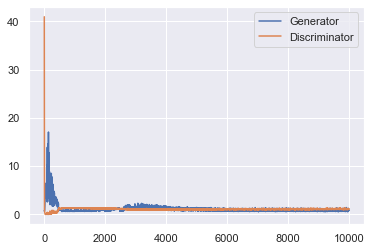

In [2]:
x = np.arange(10001)
plt.plot(x,gloss, label = 'Generator')
plt.plot(x,dloss, label = 'Discriminator')
plt.legend()

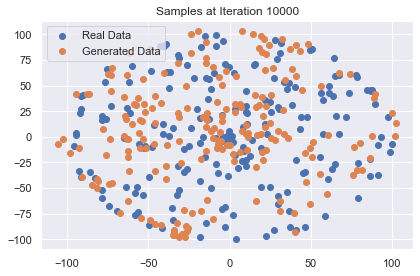

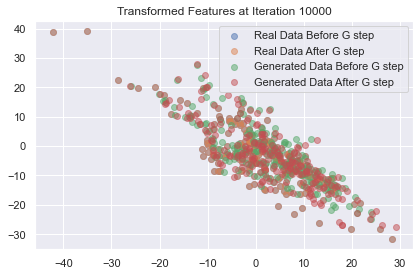

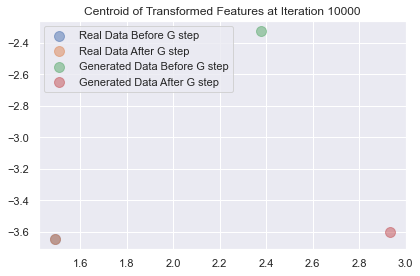

In [3]:
plt.figure()
g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
xax = plt.scatter(x_plot[:,0], x_plot[:,1])
gax = plt.scatter(g_plot[:,0],g_plot[:,1])

plt.legend((xax,gax), ("Real Data","Generated Data"))
plt.title('Samples at Iteration %d'%i)
plt.tight_layout()


plt.figure()
rrd = plt.scatter(rrep_dstep[:,0], rrep_dstep[:,1], alpha=0.5)
rrg = plt.scatter(rrep_gstep[:,0], rrep_gstep[:,1], alpha=0.5)
grd = plt.scatter(grep_dstep[:,0], grep_dstep[:,1], alpha=0.5)
grg = plt.scatter(grep_gstep[:,0], grep_gstep[:,1], alpha=0.5)


plt.legend((rrd, rrg, grd, grg), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))
plt.title('Transformed Features at Iteration %d'%i)
plt.tight_layout()

plt.figure()

rrdc = plt.scatter(np.mean(rrep_dstep[:,0]), np.mean(rrep_dstep[:,1]),s=100, alpha=0.5)
rrgc = plt.scatter(np.mean(rrep_gstep[:,0]), np.mean(rrep_gstep[:,1]),s=100, alpha=0.5)
grdc = plt.scatter(np.mean(grep_dstep[:,0]), np.mean(grep_dstep[:,1]),s=100, alpha=0.5)
grgc = plt.scatter(np.mean(grep_gstep[:,0]), np.mean(grep_gstep[:,1]),s=100, alpha=0.5)

plt.legend((rrdc, rrgc, grdc, grgc), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))

plt.title('Centroid of Transformed Features at Iteration %d'%i)
plt.tight_layout()

In [4]:
Predictions = G_sample.predict(Test)

AttributeError: 'Tensor' object has no attribute 'predict'

# References

"Building a simple Generative Adversarial Network (GAN) using TensorFlow", Dillon Aadil Hayat, https://blog.paperspace.com/implementing-gans-in-tensorflow/